**1. Подготовка датасета**

**Скачаем датасет, переведём его в `pandas.DataFrame`.**

In [1]:
!wget "https://drive.google.com/uc?export=download&id=1qJZoC4NAu7kifBPU2EiKXqtRmPh28LW2&confirm=yes"
!mv "uc?export=download&id=1qJZoC4NAu7kifBPU2EiKXqtRmPh28LW2&confirm=yes" "socialmedia_relevant_cols.csv"

--2024-07-24 08:32:30--  https://drive.google.com/uc?export=download&id=1qJZoC4NAu7kifBPU2EiKXqtRmPh28LW2&confirm=yes
Resolving drive.google.com (drive.google.com)... 74.125.199.100, 74.125.199.138, 74.125.199.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.199.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qJZoC4NAu7kifBPU2EiKXqtRmPh28LW2&export=download [following]
--2024-07-24 08:32:30--  https://drive.usercontent.google.com/download?id=1qJZoC4NAu7kifBPU2EiKXqtRmPh28LW2&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1270924 (1.2M) [application/octet-stream]
Saving to: ‘uc?export=download&id=1qJZoC4NAu7kifBPU2EiKXqtRmPh28LW2&confirm=yes

In [2]:
import numpy as np
import pandas as pd

np.random.seed(42)

In [3]:
df = pd.read_csv('socialmedia_relevant_cols.csv', encoding_errors="replace")
df.sample(30)

text    choose_one  \
10219  The sunset looked like an erupting volcano ......      Relevant   
1413   #7294 Nikon D50 6.1 MP Digital SLR Camera Body...      Relevant   
8887   Mental/Twitter Note: Make sure my smoke alarm ...  Not Relevant   
4505   ?????? EMERGENCY ?????? NEED PART 2 and 3!!! #...  Not Relevant   
8765   WHELEN MODEL 295SS-100 SIREN AMPLIFIER POLICE ...  Not Relevant   
9853   Today was trauma on top of trauma on top of  t...  Not Relevant   
8385   @JulieChen she shouldn't. Being with them is g...  Not Relevant   
2492   San Antonio Stars head coach Dan Hughes was ju...  Not Relevant   
510    5 Seconds of Summer Is my pick for http://t.co...  Not Relevant   
9030   Stretcher in 5 min // Speaker Deck http://t.co...  Not Relevant   
4418   So that it'll electrocute somebody's ass baa.....  Not Relevant   
1747   Ever since Kelly's burned I keep having dreams...  Not Relevant   
10179  Violent Forces Radio: Now Playing Acid Storm -...      Relevant   
7065   @JustinTrudeau \r\n\r\nMost respected in world...  Not Relevant   
4726   FWD: I literally jumped out of bed put on beac...  Not Relevant   
10839  Calgary Police Flood Road Closures in Calgary....      Relevant   
9772   Billionaires have a plan to free half a billio...  Not Relevant   
4139   Moderate #drought is spreading rapidly across ...      Relevant   
4110   @MarcVegan @NonDairyKerry true. Also takes 160...      Relevant   
33                                           Love skiing  Not Relevant   
7589   Families to sue over Legionnaires: More than 4...      Relevant   
3077   No two cases don't constitute an epidemic. htt...      Relevant   
304    Cop pulls drunk driver to safety SECONDS befor...      Relevant   
4477   @philadper2014 They would all get #Electrocute...  Not Relevant   
6646   sorry but that mousse inundation was fuckin hi...  Not Relevant   
9797   Hollywood Movie About Trapped Miners Released ...      Relevant   
6890   @MNPDNashville @MontalbanoNY sadly suicide by ...      Relevant   
4879   Is he about to crash?\r\nDid the Queen die?\r\...      Relevant   
9547   Is this the end of Australia �s best burger? h...  Not Relevant   
9424   RT @SyedIHusain @penelopephoto \r\nThe man who...      Relevant   

       class_label  
10219            1  
1413             1  
8887             0  
4505             0  
8765             0  
9853             0  
8385             0  
2492             0  
510              0  
9030             0  
4418             0  
1747             0  
10179            1  
7065             0  
4726             0  
10839            1  
9772             0  
4139             1  
4110             1  
33               0  
7589             1  
3077             1  
304              1  
4477             0  
6646             0  
9797             1  
6890             1  
4879             1  
9547             0  
9424             1

Выше при чтении csv-файла я выставил параметр `encoding_errors="replace"`. Так, в случае нахождения ошибки при чтении некоторого байта в нашем csv-файле этот байт будет заменяться на байт, соответствующий символу '�' (затем этот символ можно будет всюду удалить).

Интересно, что в большинстве случаев на месте символа '�' раньше были либо эмодзи, либо вспомогательные пунктуационные символы (например, апострофы). Можно предполагать, что использование пунктуационных символов особо не влияет на смысл текста, поэтому их можно удалить. С эмодзи всё сложнее - они могут содержать в себе определённый смысл и придавать твиту некоторую эмоциональную окраску (таким образом, эмодзи могут значительно менять смысл твита). Тем не менее анализ влияния эмодзи на общий смысл твита - отдельная достаточно сложная задача, поэтому для простоты будем также игнорировать эмодзи.

Также можно предполагать, что на месте символа '�' раньше могли быть символы, соответствующие буквам некоторых языков, не покрываемых кодировкой UTF-8, например, китайские и японские иероглифы, арабские буквы и т.п. Тем не менее из первичного исследования датасета можно предположить, что такие кейсы здесь не встречаются. Более того, после анализа датасета можно выдвинуть предположение, что все твиты в нём - на английском.

**Удалим теперь во всех строках, в текстах твитов символ '�':**

In [4]:
df["text"] = df["text"].str.replace('�', ' ')

df.iloc[9547] # проверяем, что символы удалились

text           Is this the end of Australia  s best burger? h...
choose_one                                          Not Relevant
class_label                                                    0
Name: 9547, dtype: object

Всё ок.

**Удалим теперь теги других пользователей в твитах, так как они не несут никакого смысла, если у нас нет какого-то дополнительного контекста (например, сопоставлений пользователей и их тегов и т.д.).**

In [5]:
df["text"] = df["text"].str.replace(r'@\S+', ' ', regex=True)

df.iloc[4110]

text               true. Also takes 16000 gal water to produc...
choose_one                                              Relevant
class_label                                                    1
Name: 4110, dtype: object

Все сделали правильно - тегов больше нет.

**При этом некоторые люди могут использовать символ '@' без какого-либо непробельного символа после него => тогда это не будет считаться тегом.**

**Символ '@' означает то же самое, что "at". Сделаем соответствующую замену.**

In [6]:
df["text"] = df["text"].str.replace('@', " at ")

**Также стоит удалить всевозможные ссылки, так как из них также сложно извлечь информацию без дополнительных знаний.**

In [7]:
df["text"] = df["text"].str.replace(r'https:\S+', ' ', regex=True).replace(r'http:\S+', ' ', regex=True).replace(r'www.\S+', ' ', regex=True)

df.iloc[510]

text           5 Seconds of Summer Is my pick for   Fan Army ...
choose_one                                          Not Relevant
class_label                                                    0
Name: 510, dtype: object

Всё сделали правильно - ссылок больше нет.

In [8]:
df.sample(30)

text    choose_one  \
3074    we will never know what would have happened ...      Relevant   
5979    Hi ..Is there an email that people can use t...      Relevant   
6331  Nearly 35 years after their release from capti...  Not Relevant   
1443              G+: +  Body Bagging them lyrically!    Not Relevant   
5778  Forest fires could delay   but officials say i...      Relevant   
8815  Marketforce Perth named winner of Sirens round...  Not Relevant   
5728  Crews responding to small brush fire burning i...      Relevant   
3929  Actually if I don't see Hunter Hayes and Lady ...  Not Relevant   
5553                                    flattened frog?  Not Relevant   
2988                       IS ROSS DEAD NOOOOOOOOOOOO    Not Relevant   
2819  BBC Forced To Retract False Claims About Cyclo...      Relevant   
2345  Ashes 2015: Rampant England humiliate rival Au...  Not Relevant   
1552  Why American censors supressed accounts of suf...      Relevant   
8160  Fears over missing migrants in Med: Rescuers s...      Relevant   
8041  Top story:   'Couple spend wedding day feeding...      Relevant   
7535  Refugio oil spill may have been costlier bigge...      Relevant   
1710  Mexico: construction of bridge collapse killsξ...      Relevant   
9520  You May Know Me from Such Roles as Terrorist #4    Not Relevant   
6674  it's actually funny how chihaya remains a rela...  Can't Decide   
7133  Obama warns there will be another war without ...      Relevant   
1662  What it was like to survive the atomic bombing...      Relevant   
5829  Calgary pounded with hail on second day of sto...      Relevant   
3864  Ignition Knock (Detonation) Sensor Connector-C...  Not Relevant   
7384  I'd love to see a nigga try and diss the King ...  Not Relevant   
1827                                Burned my popcorn??  Not Relevant   
9832      I have childhood trauma more resolved than...  Not Relevant   
1509            Lab today ready for these body bags. ??  Not Relevant   
4003                                 I'm a disaster??    Not Relevant   
5752  As California fires rage the Forest Service so...      Relevant   
7322  Steam pipe problems sideline US #Navy's 3 newe...  Not Relevant   

      class_label  
3074            1  
5979            1  
6331            0  
1443            0  
5778            1  
8815            0  
5728            1  
3929            0  
5553            0  
2988            0  
2819            1  
2345            0  
1552            1  
8160            1  
8041            1  
7535            1  
1710            1  
9520            0  
6674            2  
7133            1  
1662            1  
5829            1  
3864            0  
7384            0  
1827            0  
9832            0  
1509            0  
4003            0  
5752            1  
7322            0

**Отделим от слов все важные знаки препинания в твитах, т.е. такие, которые могут повлиять на смысл предложения (тем самым не будем терять смысл твитов, зависящих от пунктуации, например, "казнить нельзя, помиловать"). Важными знаками препинания будем считать следующие: `',', '.', '!', '?', ':', ';', ' ' '`.**

**Перед этим удалим все многоточие, так как они не несут особой смысловой нагрузки:**

In [9]:
df["text"] = df["text"].str.replace(r'\.{2,}', ' ', regex=True)

**Также заменим все вопросы/восклицательные знаки, повторяющиеся больше 1 раза на соответствующий одинарный знак:**

In [10]:
df["text"] = df["text"].str.replace(r'\?{2,}', '?', regex=True).replace(r'\!{2,}', '!', regex=True)

**Также удалим предварительно символы, полученные, при парсинге, - такие, как как `"&amp;"`, `"&lt;"` (они были обнаружены мной при анализе твитов в датасете).**

In [11]:
unnecessary_punct = ["&amp;", "&lt;"]
for i in unnecessary_punct:
    df["text"] = df["text"].str.replace(i, ' ')

Всё ок. Теперь преобразуем важные знаки препинания так, как указано выше.

In [12]:
important_punct = [',', '.', '!', '?', ':', ';', '\'']
for i in important_punct:
    df["text"] = df["text"].str.replace(i, ' ' + i + ' ')

df.iloc[1509]

text           Lab today ready for these body bags .   ? 
choose_one                                   Not Relevant
class_label                                             0
Name: 1509, dtype: object

Всё ок.

**Удалим теперь некоторые неважные знаки препинания и вспомогательные символы (полученные, например, при парсинге, как символ перевода строки `"\n"`), в том числе символ решётки, который используют для хэштегов (при этом сами хэштеги, конечно, удалять не надо, так как в них может содержаться важная для понимания контекста информация). При этом однозначно оставляем все underscore'ы и дефисы, так как они могут влиять на понимание самих слов/наименований.**

In [13]:
unnecessary_punct = ['#', '^', '*', '(', ')', '\\', '/', '\'', '\"', '\n', '\r', '\t', '`']
for i in unnecessary_punct:
    df["text"] = df["text"].str.replace(i, ' ')

df.iloc[7322]

text           Steam pipe problems sideline US  Navy   s 3 ne...
choose_one                                          Not Relevant
class_label                                                    0
Name: 7322, dtype: object

Всё ок.

**Заменим символ '&' на " and " (на всякий случай, если он вдруг где-то ещё остался):**

In [14]:
df["text"] = df["text"].str.replace('&', " and ")

Всё ок.

**Заметим, что регистр, в котором находится текст, особо не влияет на его смысл => можно привести весь текст к нижнему регистру. Также можно везде уменьшить число пробелов между словами до 1 (если надо). Сделаем это.**

In [15]:
df["text"] = df["text"].str.lower()
df["text"] = df["text"].apply(lambda text: ' '.join(text.split()))
df.sample(10)

text    choose_one  \
6176   swansea ? plot hijack transfer move for southa...      Relevant   
10274                   looks and sounds like a war zone      Relevant   
9565     playingnow bloodbound seven angels media stream  Not Relevant   
8688        a random hole just broke out in the street ?  Not Relevant   
5765   pray ! for east coast forest fires ! pray ! th...      Relevant   
5772   climate consequences : u . s . forest service ...      Relevant   
7338   finnish ministers : fennovoima nuclear reactor...  Not Relevant   
4985         that s always good for a pretty explosion .      Relevant   
5064   russia food crematoria provoke outrage in coun...      Relevant   
7895   nuclear emergency current usa radiation levels...  Not Relevant   

       class_label  
6176             1  
10274            1  
9565             0  
8688             0  
5765             1  
5772             1  
7338             0  
4985             1  
5064             1  
7895             0

Всё ок.

**Осталось только удалить стоп-слова из текста, например, артикли. Сделаем это с помощью библиотеки nltk.**

In [16]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df["text"] = df["text"].apply(lambda text: ' '.join(list(word for word in text.split() if word not in stop_words)))

df.sample(10)

text    choose_one  \
3264                    ugh hungry going demolish food !  Not Relevant   
10300  fun fact : every rapid-fire weapon game hard c...  Not Relevant   
766    plus performance chip fuel saver chevy silvera...      Relevant   
2210   chemical brothers play armory sf tomorrow nigh...  Not Relevant   
8303            china stock market crash : gems rubble ?  Not Relevant   
4742   sooo police dispatch said person threatening s...      Relevant   
5875          calgary news weather traffic august 5 ~ 45  Not Relevant   
872    fedex longer transport bioterror germs wake an...      Relevant   
9600              thunder outside house afternoon gawx ?      Relevant   
1306   awful refereeing ruined balance game . guy blo...  Not Relevant   

       class_label  
3264             0  
10300            0  
766              1  
2210             0  
8303             0  
4742             1  
5875             0  
872              1  
9600             1  
1306             0



---



**2. Графики**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 12})

In [19]:
def draw_wordcloud(texts, max_words=1000, width=1000, height=500):
    wordcloud = WordCloud(background_color='white', max_words=max_words,
                          width=width, height=height)

    joint_texts = ' '.join(list(texts))
    wordcloud.generate(joint_texts)
    return wordcloud.to_image()

**Посмотрим на баланс классов:**



---



**Заметим, что всего классов 3:**

In [20]:
df["class_label"].unique()

array([1, 0, 2])

**Также из данных следует, что класс 0 - нерелевантный твит (не какая-то катастрофа), класс 1 - релевантный твит (катастрофа), класс 2 - твит, про который ничего нельзя сказать точно:**

In [21]:
df.loc[df["class_label"] == 0, "choose_one"].unique()

array(['Not Relevant'], dtype=object)

In [22]:
df.loc[df["class_label"] == 1, "choose_one"].unique()

array(['Relevant'], dtype=object)

In [23]:
df.loc[df["class_label"] == 2, "choose_one"].unique()

array(["Can't Decide"], dtype=object)

****

In [24]:
freqs_by_classes = df.groupby(by="choose_one").size().reset_index().rename(columns={0: "occurences"})
freqs_by_classes.sort_values(by="occurences", ignore_index=True, inplace=True)
freqs_by_classes

choose_one  occurences
0  Can't Decide          16
1      Relevant        4673
2  Not Relevant        6187

**В целом уже из датафрейма выше видно, что классы не сбалансированы.**

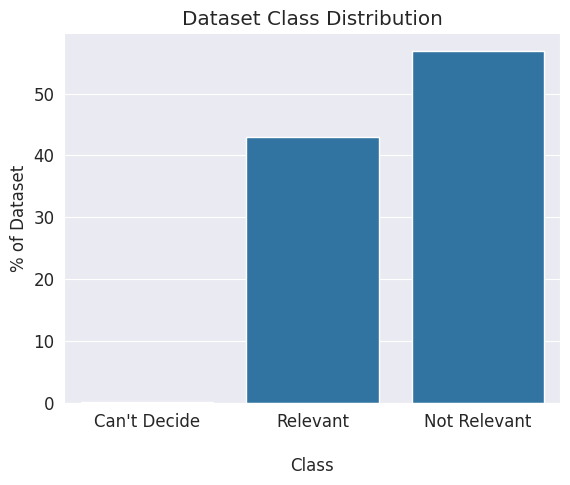

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.barplot(x=freqs_by_classes["choose_one"], y=freqs_by_classes["occurences"] / len(df) * 100, ax=ax)

ax.set_title("Dataset Class Distribution")
ax.set_xlabel("\nClass")
ax.set_ylabel("% of Dataset")

plt.show()

**Построим теперь облако слов по всему датасету, посмотрим на то, какие слова в твитах встречаются чаще остальных. Исследуем также распределение 100 самых популярных слов по всему датасету.**

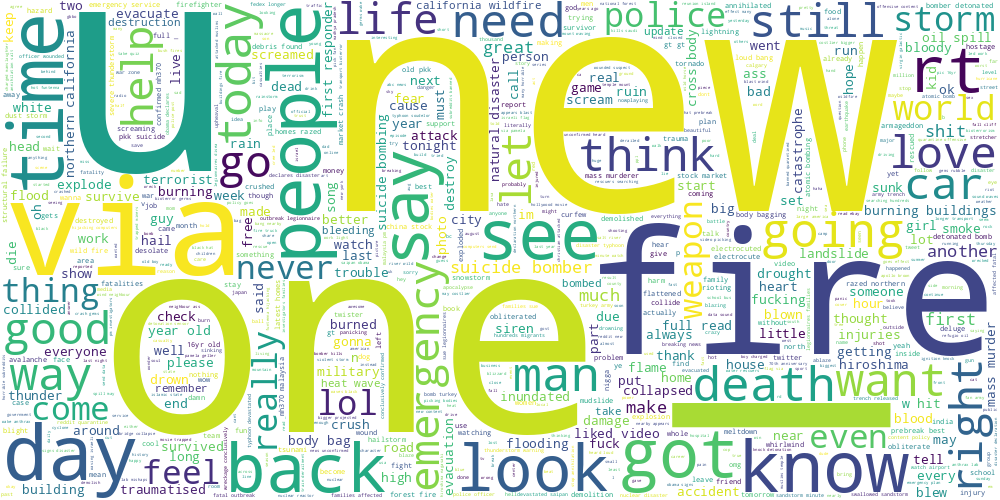

In [26]:
draw_wordcloud(df["text"])

Как можно видеть выше, самые популярные слова - достаточно типичные слова (без какой-либо специфики) типа "new", "one", "day" и т.п. Тем не менее также среди достаточно популярных слов есть такие, которые как-то связаны с темой катастроф, катаклизмов, насилия: "storm", "fire", "drought", "suicide bomber" и т.п., что логично, так как твитов про катастрофы в датасете - больше 40 %.

Исследуем теперь распределение 100 самых популярных (высокочастотных) слов.

In [27]:
def find_topk_popular_words_distr(text, k):
    word_count = dict()
    text_words = text.split()
    for word in text_words:
        if word not in word_count:
            word_count[word] = 0
        word_count[word] += 1
    topk_words = list(sorted(list(word_count.items()), key=lambda x: x[1], reverse=True))[:k]
    for i in range(k):
        topk_words[i] = [topk_words[i][0], topk_words[i][1]]
        topk_words[i][1] /= len(text_words)
    return pd.DataFrame(topk_words, columns=["word", "proba"])

In [28]:
joint_texts = ' '.join(list(df["text"]))
top100_words_distr = find_topk_popular_words_distr(joint_texts, 100)
top100_words_distr

word     proba
0          .  0.044277
1          :  0.027167
2          ?  0.016569
3          !  0.011545
4          -  0.010508
..       ...       ...
95    please  0.000893
96    really  0.000893
97       lol  0.000893
98  wildfire  0.000884
99     water  0.000884

[100 rows x 2 columns]

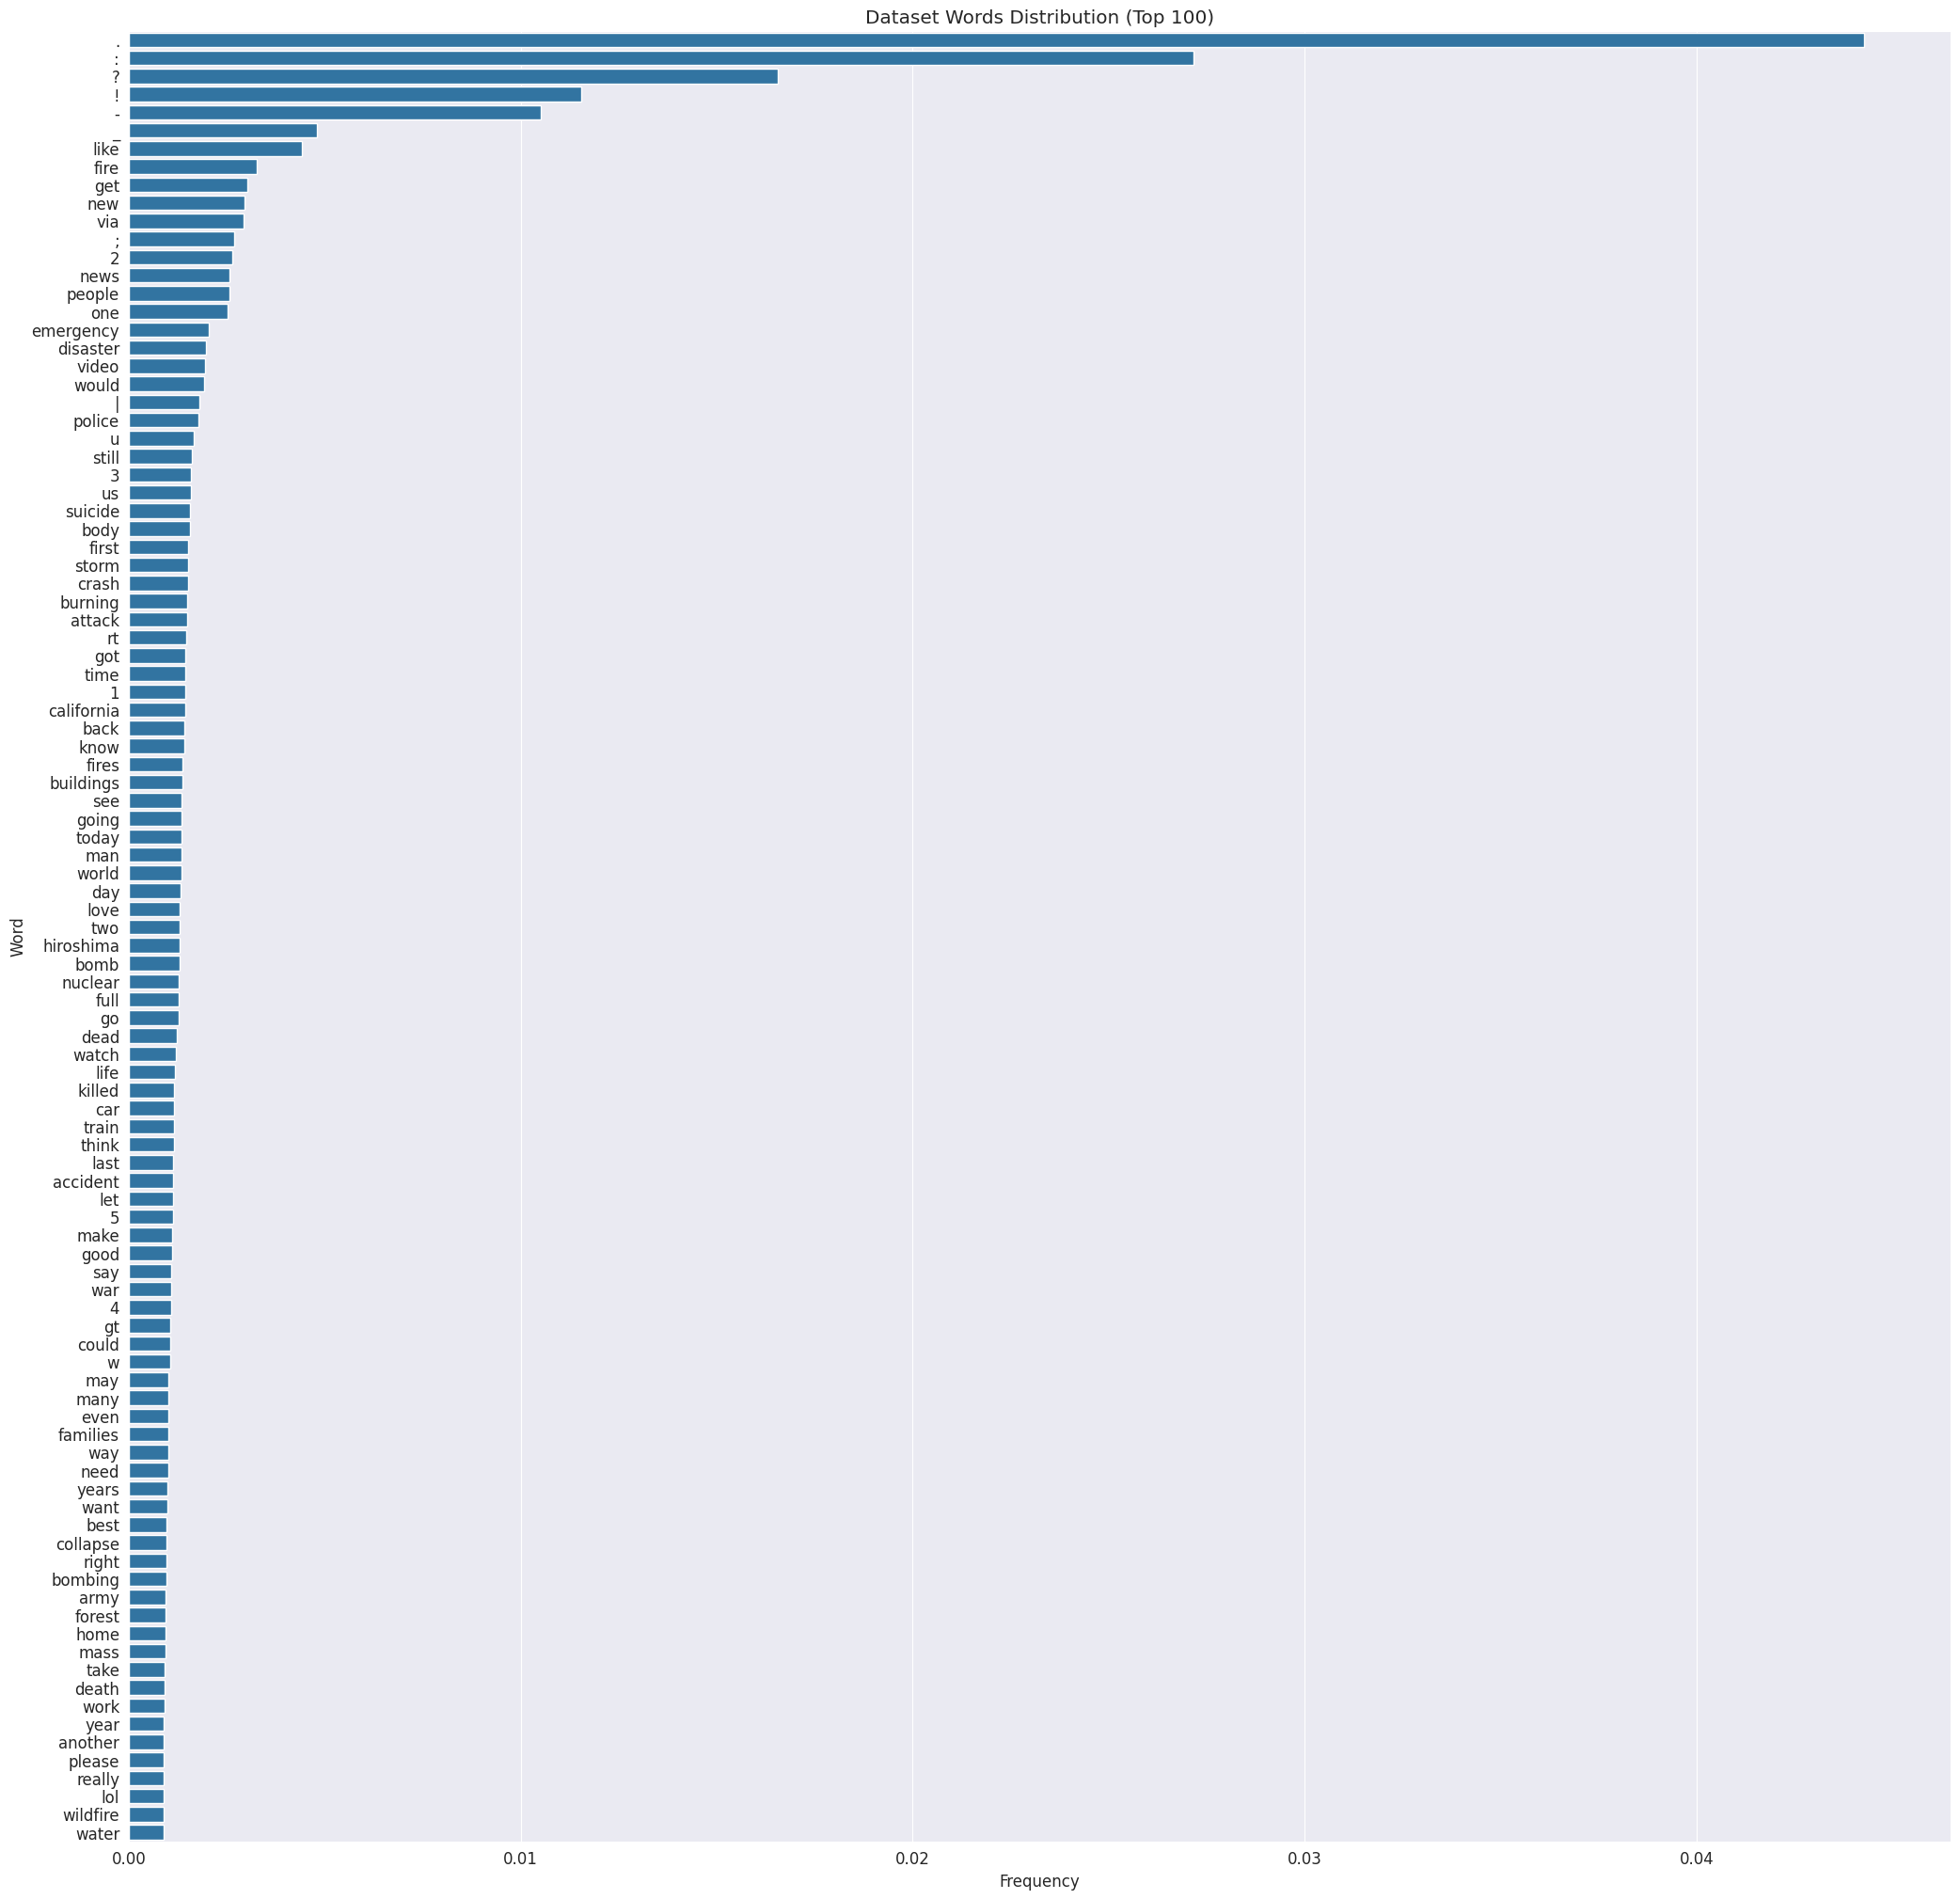

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

sns.barplot(x=top100_words_distr["proba"], y=top100_words_distr["word"], ax=ax)

ax.set_title("Dataset Words Distribution (Top 100)")
ax.set_xlabel("Frequency")
ax.set_ylabel("Word")

plt.show()

Из распределения следует, что очень многие популярные слова - про катастрофы, катаклизмы, военные конфликты и т.д.

Также, как можно было предположить, наиболее популярные "слова" - знаки препинания. Тем не менее пока оставим их.

**Исследуем также распределение твитов по их длине:**

In [30]:
df_copy = df.copy(deep=True)
df_copy["length"] = df["text"].str.len()

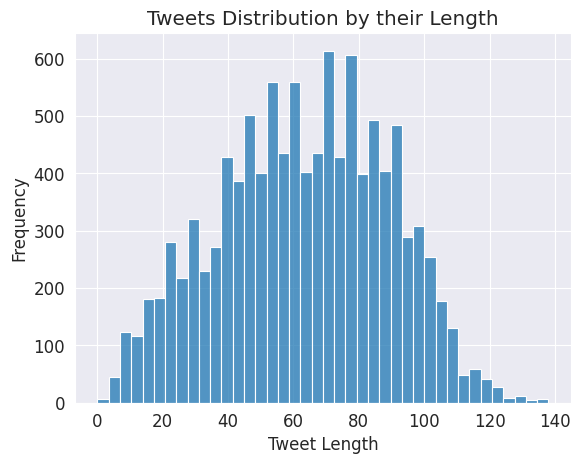

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.histplot(x=df_copy["length"], ax=ax)

ax.set_title("Tweets Distribution by their Length")
ax.set_xlabel("Tweet Length")
ax.set_ylabel("Frequency")

plt.show()

**Полученное распределение похоже на нормальное.**

**Теперь рассмотрим облака слов и графики распределений (топ k слов, длина твитов) для каждого из представленных в наборе данных классов:**

- **Класс 0 (Not Relevant):**

**Облако слов:**

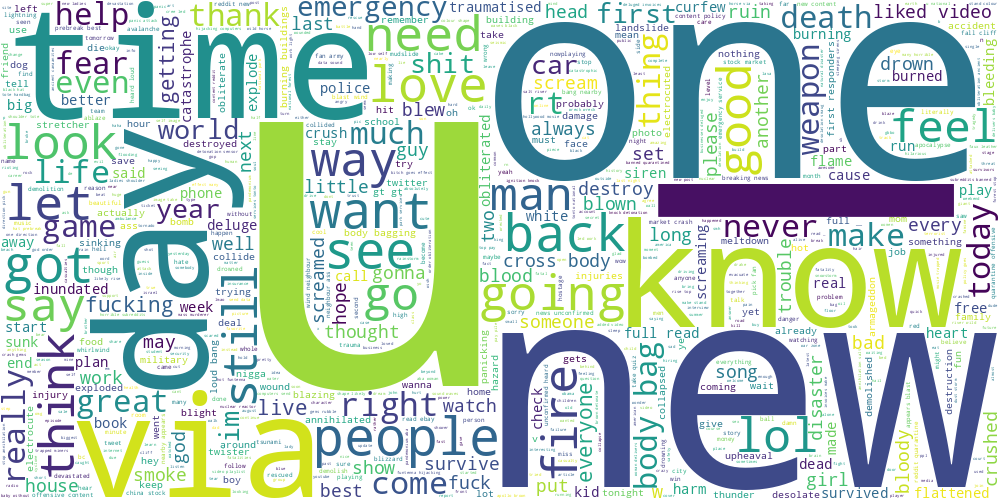

In [32]:
draw_wordcloud(df.loc[df["class_label"] == 0, "text"])

Как можно видеть, слова, связанные с катастрофами есть и в нерелевантных твитах (хотя очень много слов в облаке выше - обычные, не связанные с темой катастроф). Это немного неожиданно. Тем не менее можно предположить, что в облаке, построенном по релевантным твитам, будет гораздо больше таких слов про катастрофы (и эти слова будут популярнее - и больше - в соответствующем облаке слов).

**Распределение 100 самых популярных среди нерелевантных твитов слов:**

In [33]:
joint_texts = ' '.join(list(df.loc[df["class_label"] == 0, "text"]))
top100_irr_words_distr = find_topk_popular_words_distr(joint_texts, 100)
top100_irr_words_distr

word     proba
0          .  0.049535
1          ?  0.021909
2          :  0.020082
3          !  0.015523
4          -  0.009689
..       ...       ...
95   fucking  0.000905
96     liked  0.000905
97     cross  0.000905
98  disaster  0.000905
99   getting  0.000888

[100 rows x 2 columns]

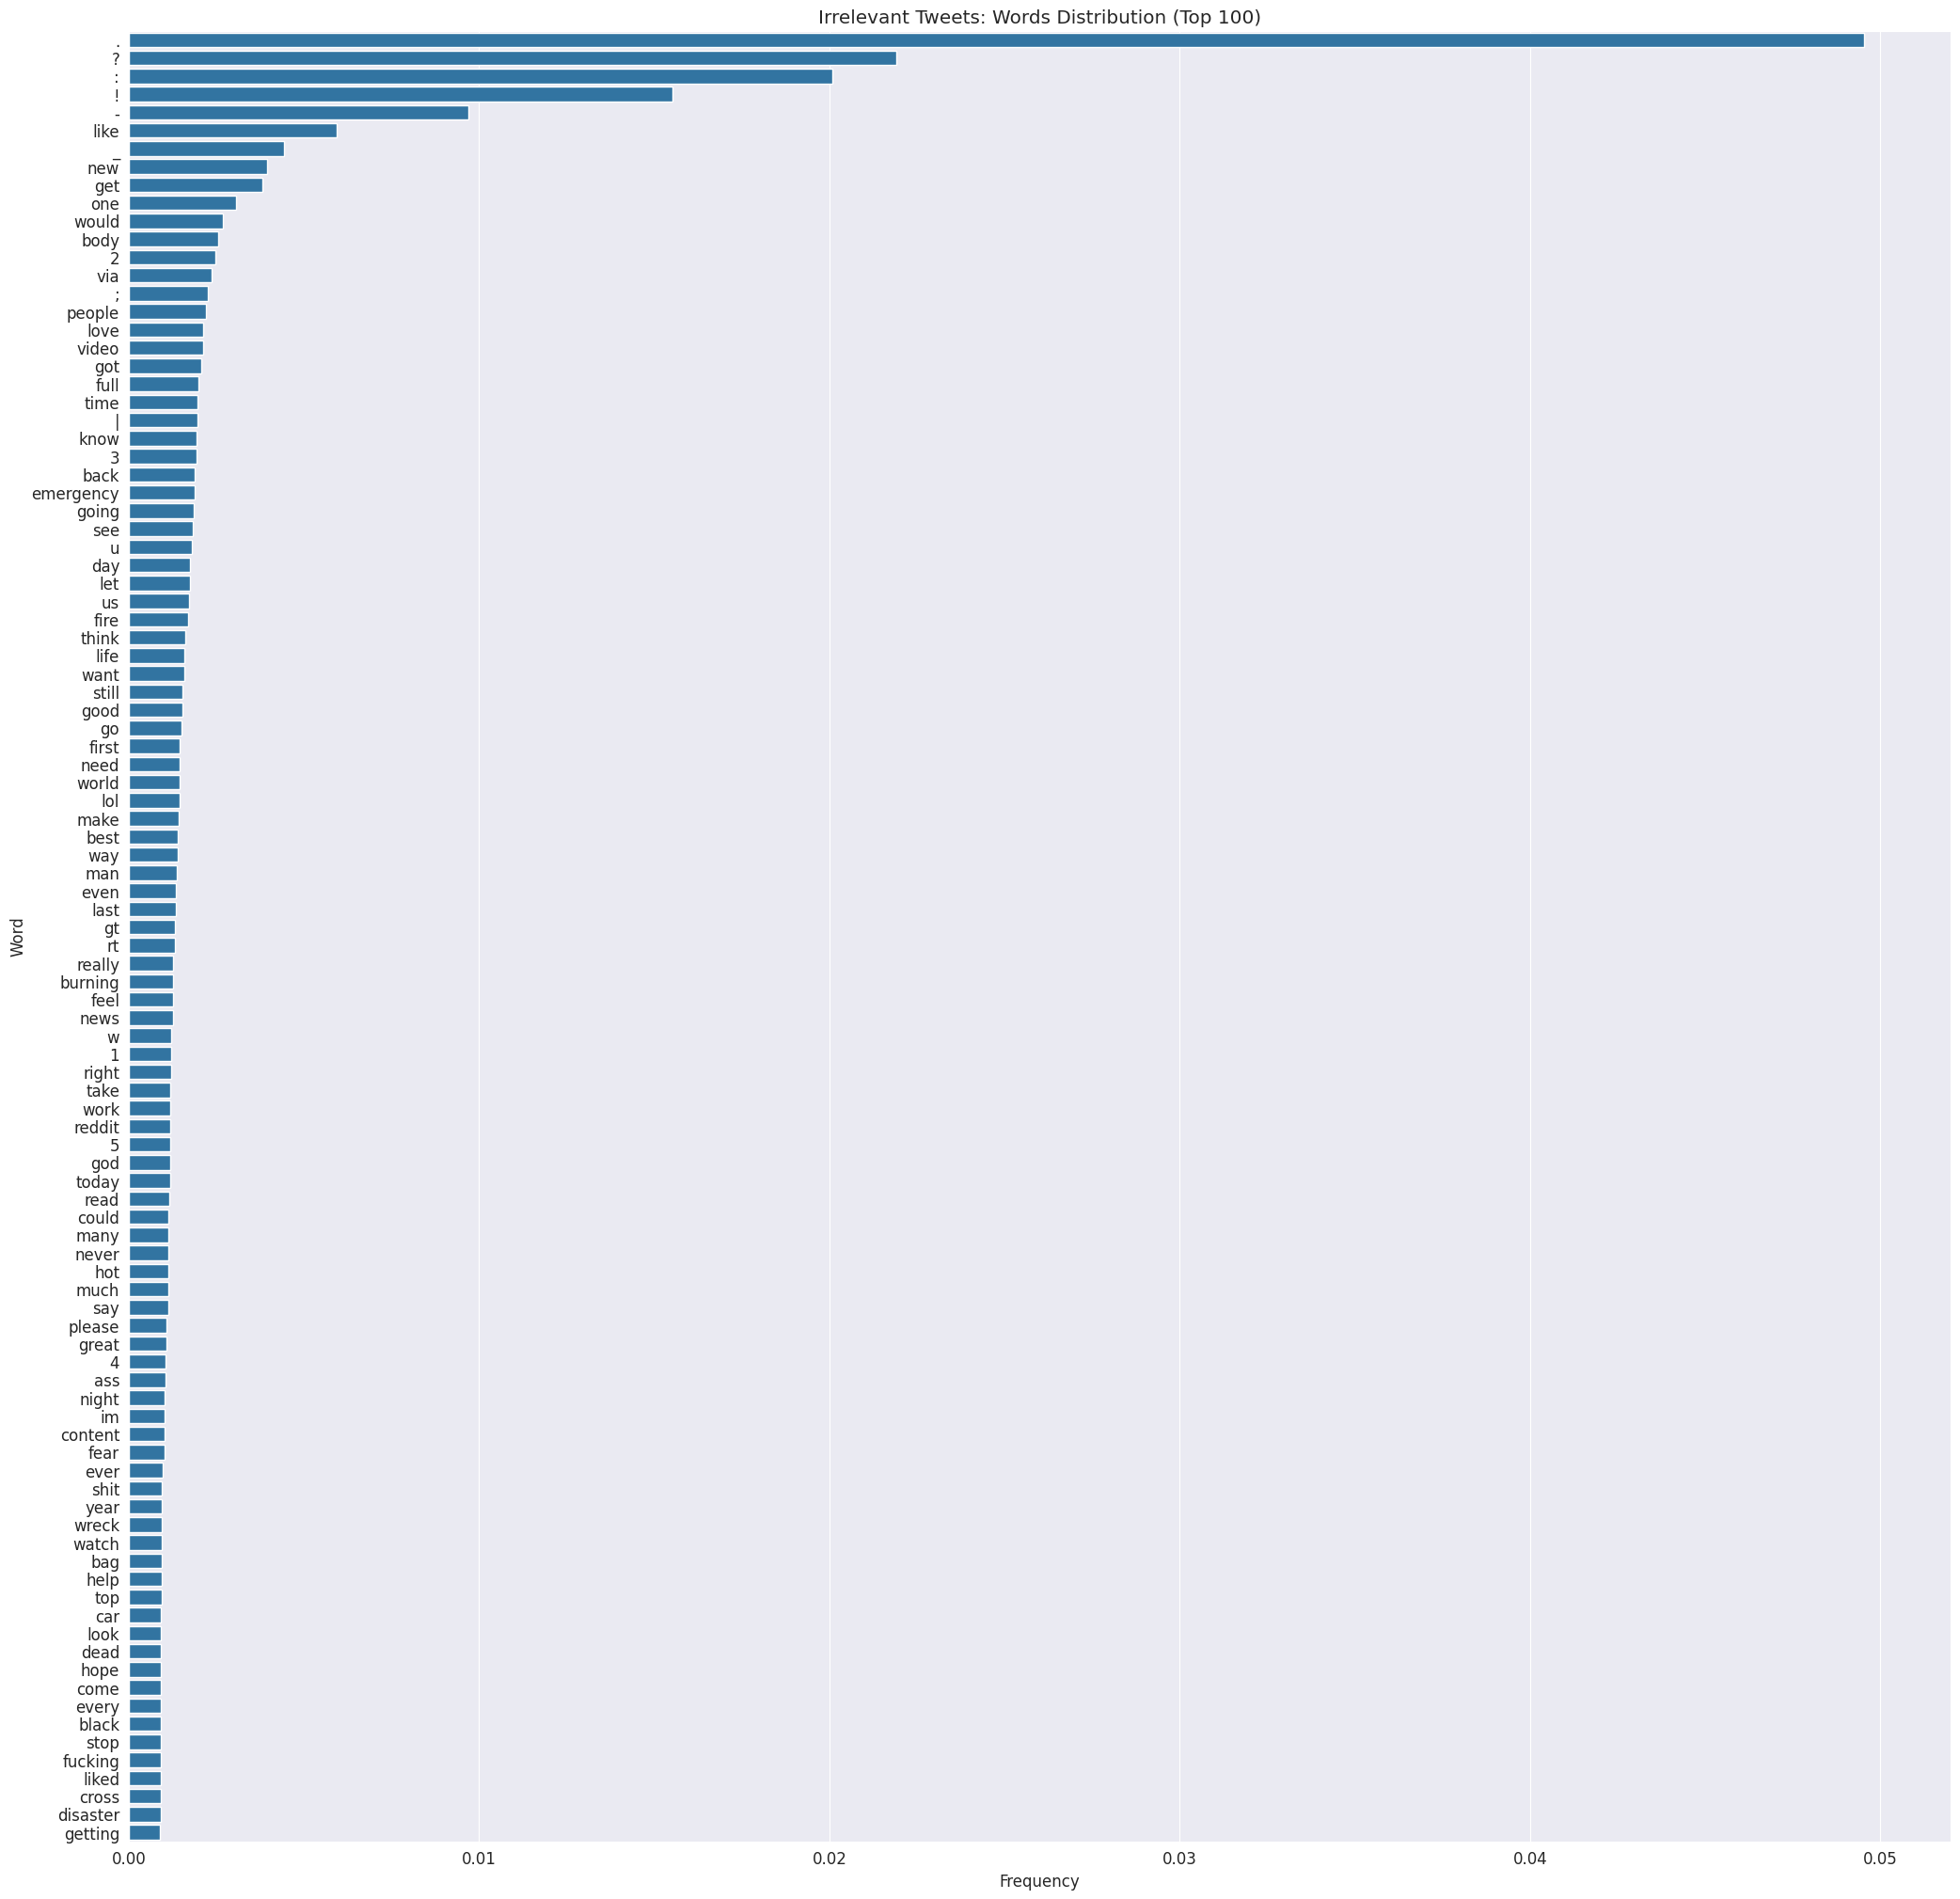

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

sns.barplot(x=top100_irr_words_distr["proba"], y=top100_irr_words_distr["word"], ax=ax)

ax.set_title("Irrelevant Tweets: Words Distribution (Top 100)")
ax.set_xlabel("Frequency")
ax.set_ylabel("Word")

plt.show()

**Распределение нерелевантных твитов по их длине:**

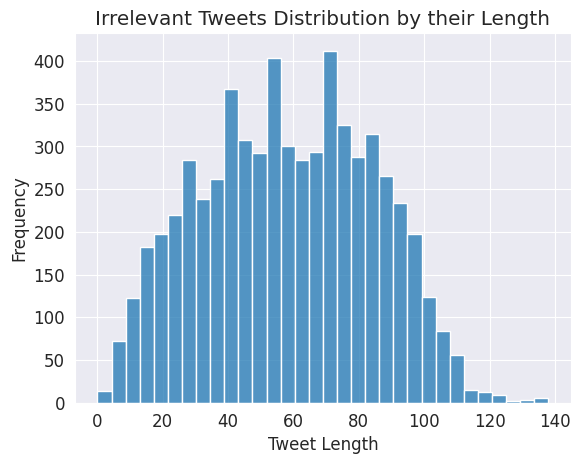

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.histplot(x=df_copy.loc[df_copy["class_label"] == 0, "length"], ax=ax)

ax.set_title("Irrelevant Tweets Distribution by their Length")
ax.set_xlabel("Tweet Length")
ax.set_ylabel("Frequency")

plt.show()

**Полученное распределение очень похоже на аналогичное для всего датасета (при этом мода распределения выше меньше, чем мода распределения для всего датасета (так как рассматриваем меньше твитов)).**

- **Класс 1 (Relevant):**

**Облако слов:**

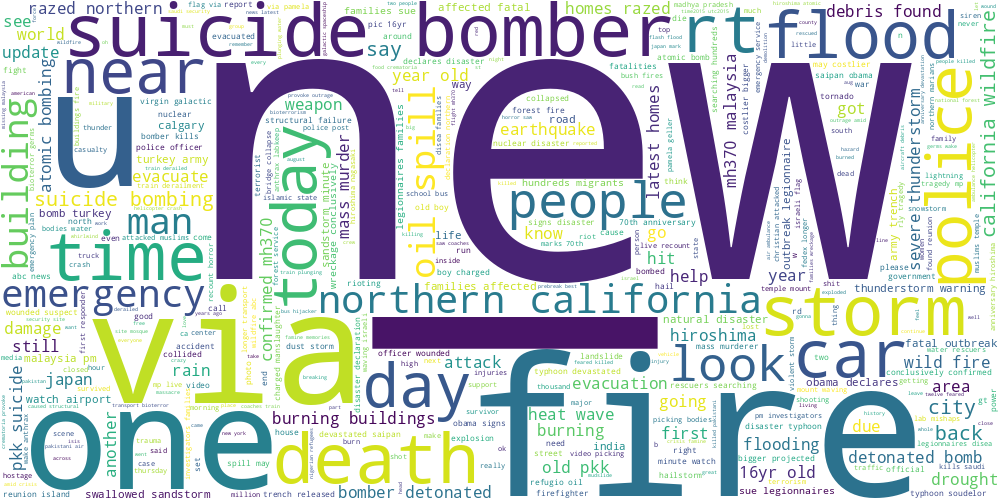

In [36]:
draw_wordcloud(df.loc[df["class_label"] == 1, "text"])

Предположение, что в облаке, построенном по релевантным твитам, гораздо больше слов про катастрофы, чем в облаке слов, построенном по нерелевантным твитам, и что эти слова будут популярнее в соответствующем облаке слов, подтвердилось.

**Распределение 100 самых популярных среди релевантных твитов слов:**

In [37]:
joint_texts = ' '.join(list(df.loc[df["class_label"] == 1, "text"]))
top100_rel_words_distr = find_topk_popular_words_distr(joint_texts, 100)
top100_rel_words_distr

word     proba
0            .  0.038159
1            :  0.035478
2            -  0.011467
3            ?  0.010274
4            !  0.006927
..         ...       ...
95        wild  0.001076
96         old  0.001076
97  evacuation  0.001057
98           8  0.001057
99       would  0.001057

[100 rows x 2 columns]

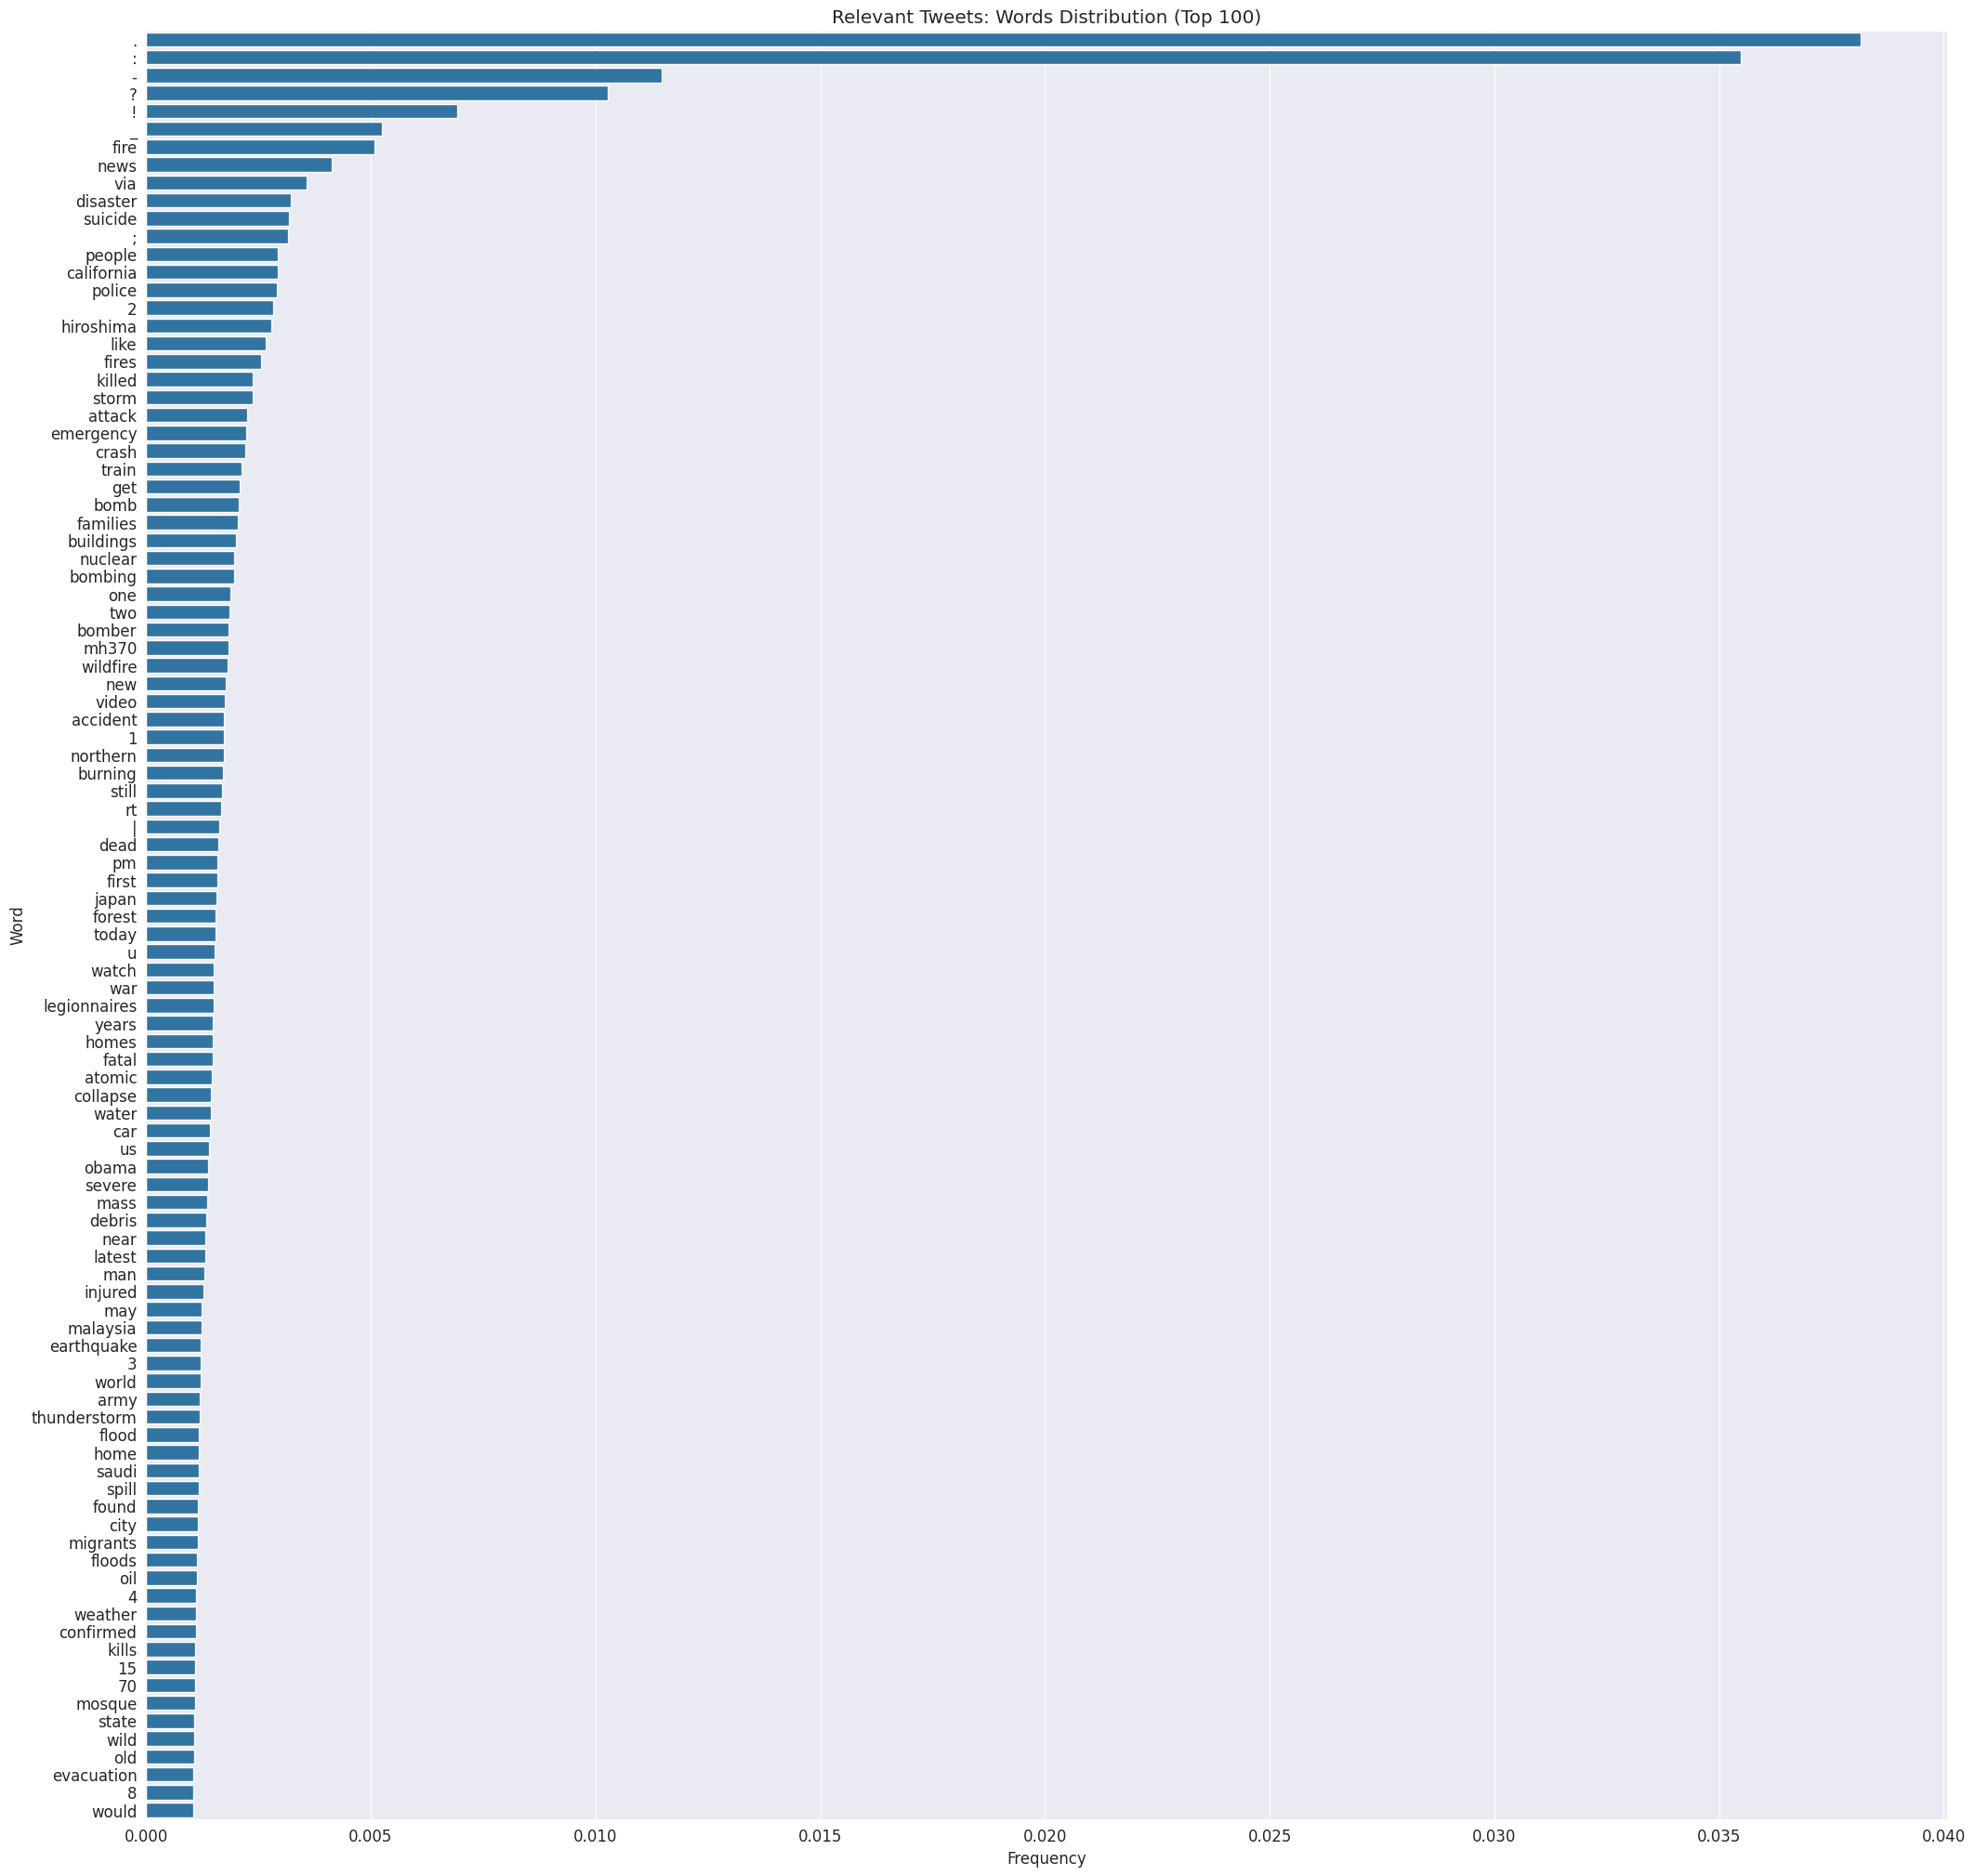

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

sns.barplot(x=top100_rel_words_distr["proba"], y=top100_rel_words_distr["word"], ax=ax)

ax.set_title("Relevant Tweets: Words Distribution (Top 100)")
ax.set_xlabel("Frequency")
ax.set_ylabel("Word")

plt.show()

**Распределение релевантных твитов по их длине:**

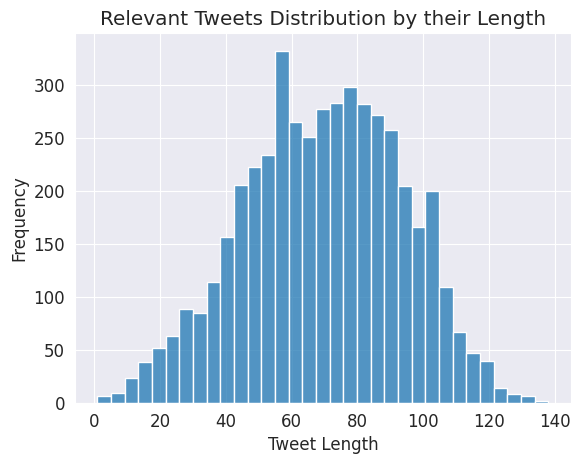

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.histplot(x=df_copy.loc[df_copy["class_label"] == 1, "length"], ax=ax)

ax.set_title("Relevant Tweets Distribution by their Length")
ax.set_xlabel("Tweet Length")
ax.set_ylabel("Frequency")

plt.show()

Здесь также получили распределение, похожее на нормальное, но, кажется, что со смещенным средним. Проверим это далее на доп. графике (ищи ниже boxplot).

- **Класс 2 (Can't Decide):**

**Облако слов:**

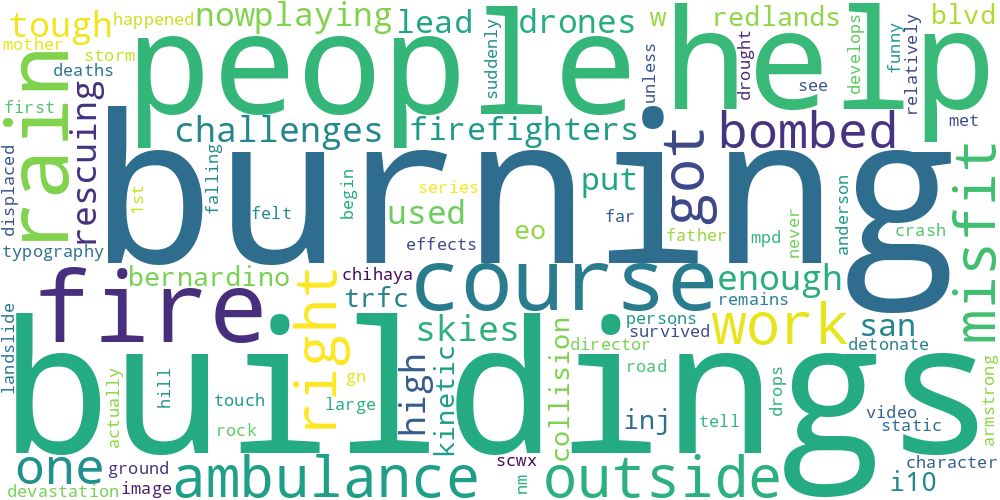

In [40]:
draw_wordcloud(df.loc[df["class_label"] == 2, "text"])

Кажется, что в полученном облаке слов слишком рандомные слова, при этом в нём есть и такие слова, которые могут относиться к теме катастроф. Но такие слова могут также встречаться и в описаниях фильмов/видеоигр, поэтому так как у нас нет допконтекста, их на самом деле можно отнести  к любому из классов.

**Распределение 98 самых популярных среди твитов, которые сложно определить к одному из классов, слов (почему 98? - Так как всего уникальных слов в таких твитах набралось 98):**

In [41]:
joint_texts = ' '.join(list(df.loc[df["class_label"] == 2, "text"]))
top98_unidentified_words_distr = find_topk_popular_words_distr(joint_texts, 98)
top98_unidentified_words_distr

word     proba
0           ?  0.043860
1           .  0.035088
2     burning  0.026316
3   buildings  0.026316
4      people  0.017544
..        ...       ...
93     father  0.008772
94     mother  0.008772
95   survived  0.008772
96      never  0.008772
97        met  0.008772

[98 rows x 2 columns]

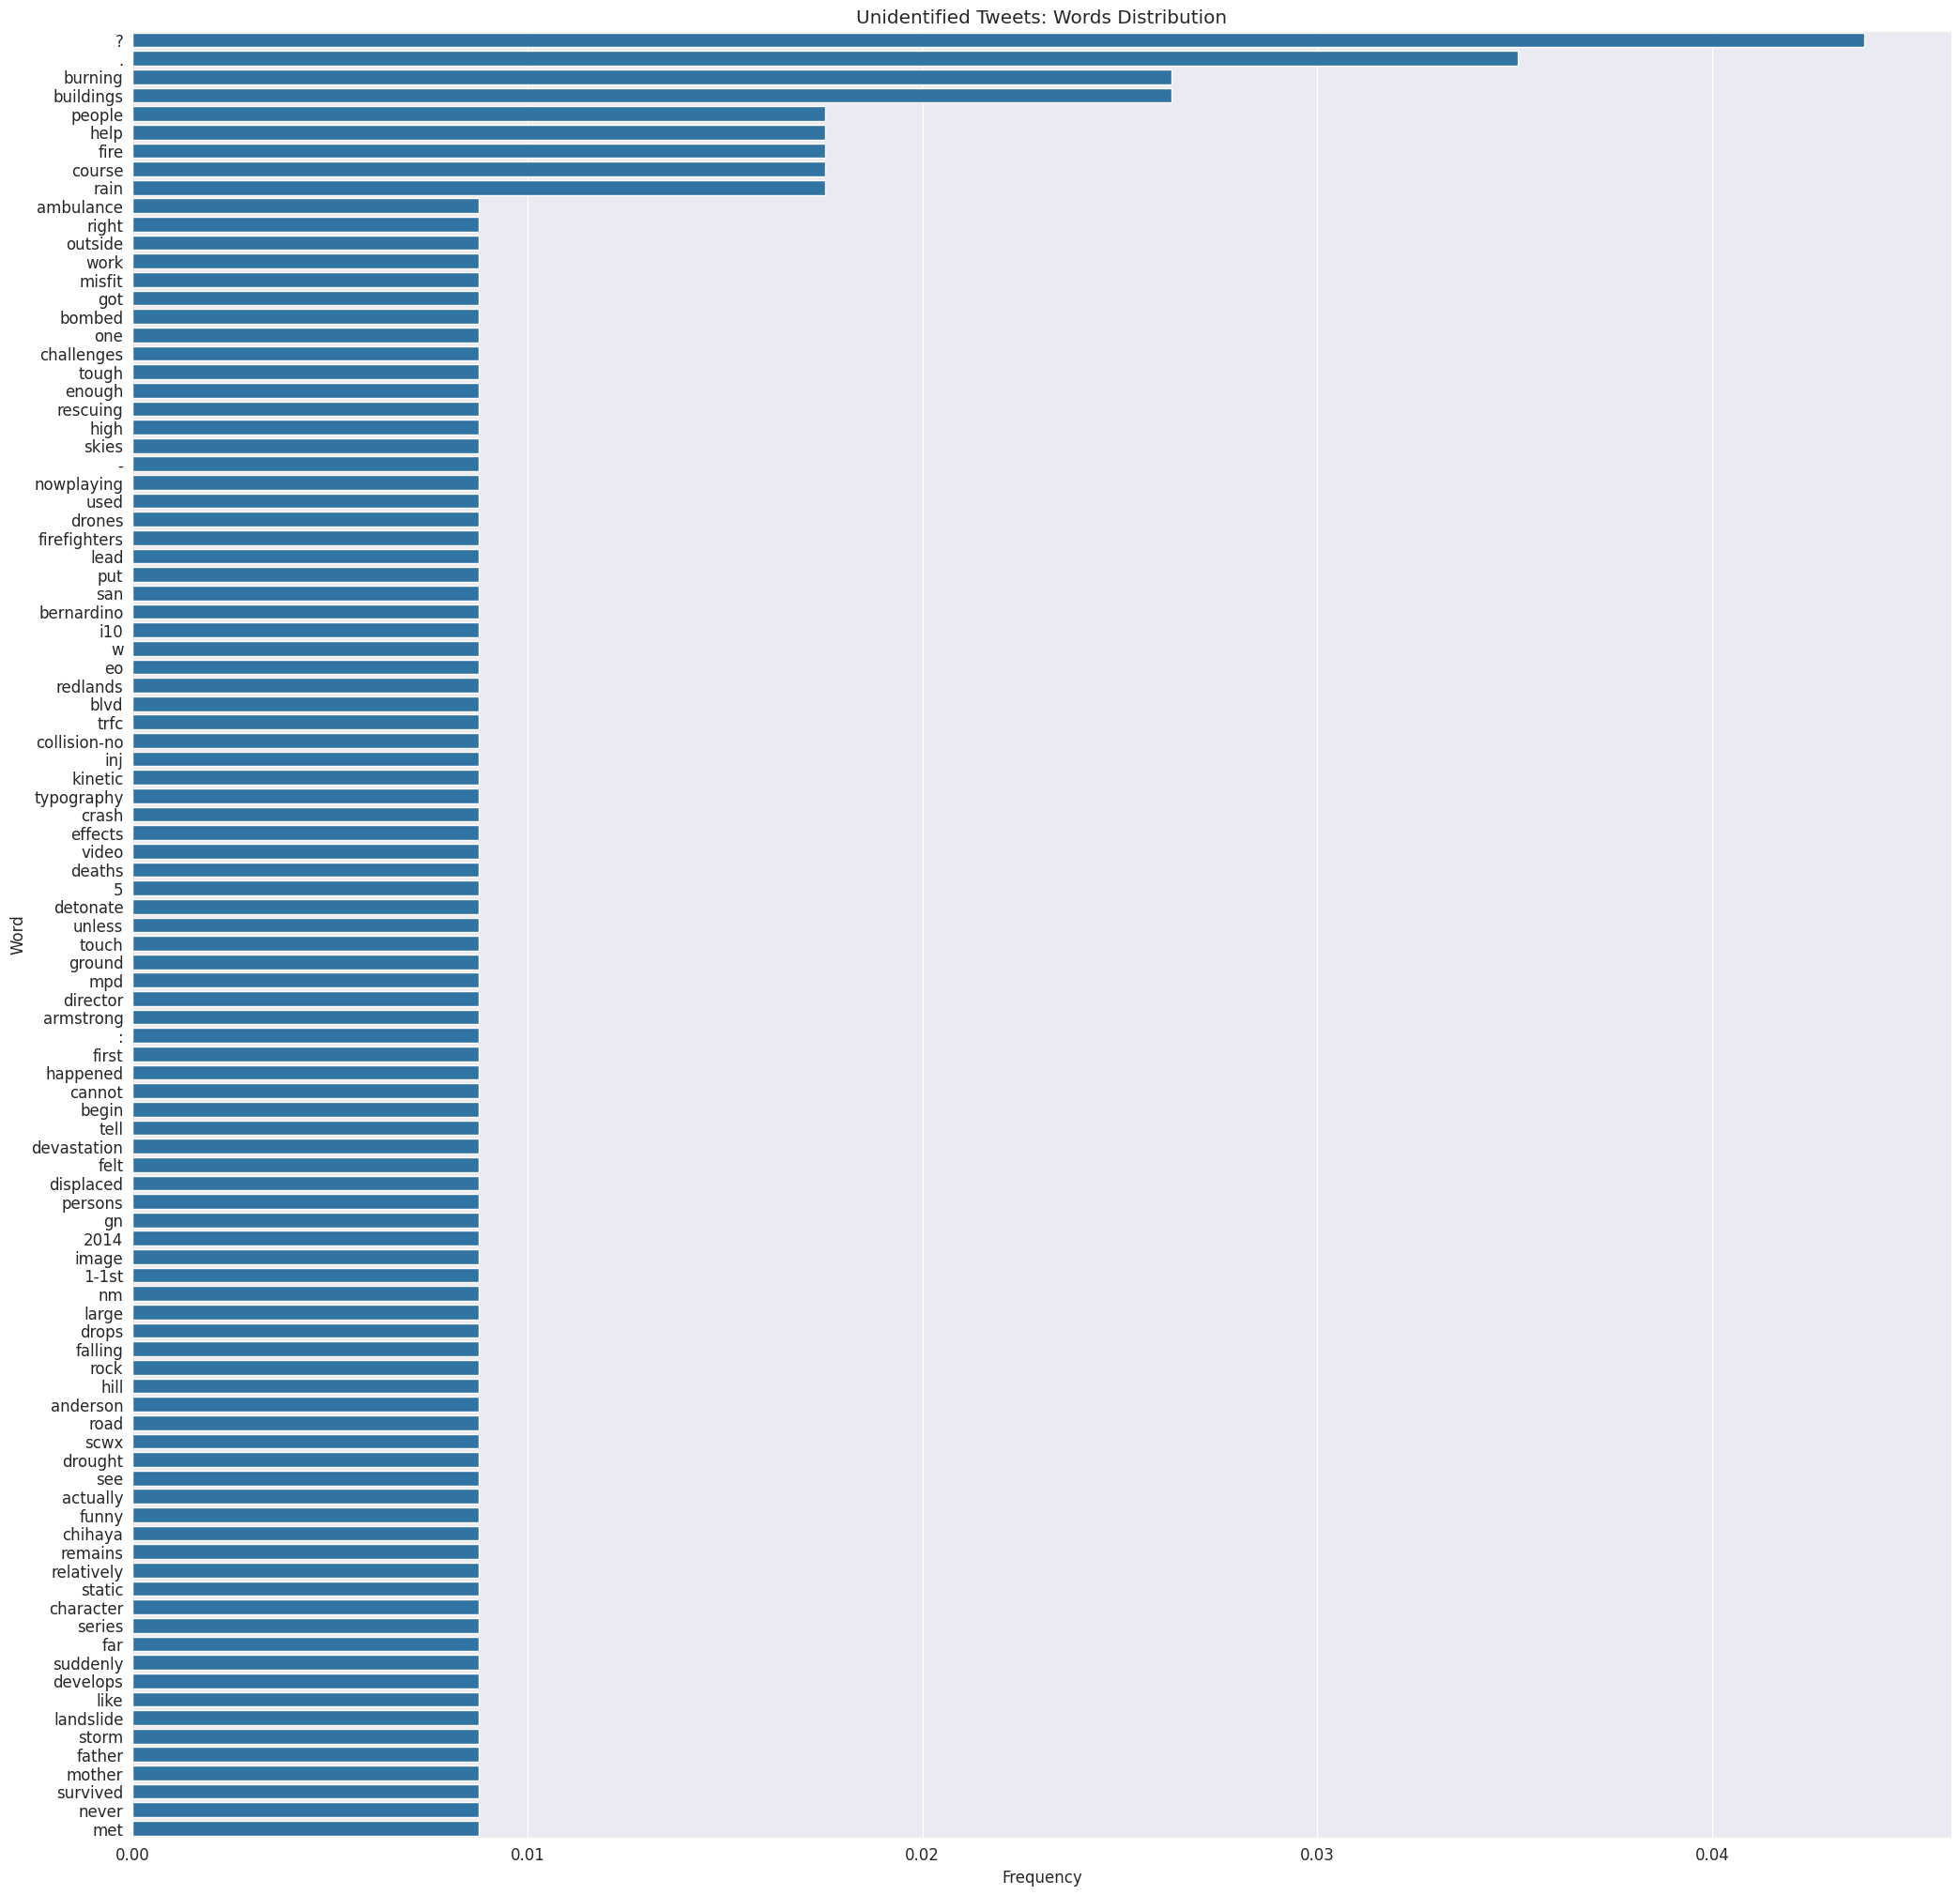

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))

sns.barplot(x=top98_unidentified_words_distr["proba"], y=top98_unidentified_words_distr["word"], ax=ax)

ax.set_title("Unidentified Tweets: Words Distribution")
ax.set_xlabel("Frequency")
ax.set_ylabel("Word")

plt.show()

**Распределение релевантных твитов по их длине:**

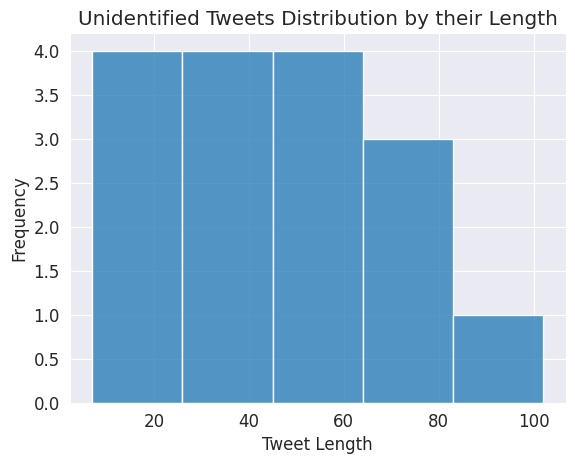

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.histplot(x=df_copy.loc[df_copy["class_label"] == 2, "length"], ax=ax)

ax.set_title("Unidentified Tweets Distribution by their Length")
ax.set_xlabel("Tweet Length")
ax.set_ylabel("Frequency")

plt.show()

Получили распределение, совсем не похожее на нормальное.

**Сравним теперь полученные распределения: по длине нерелевантных твитов, по длине релевантных твитов, по длине не отнесенных ни к одному из двух классов твитов:**

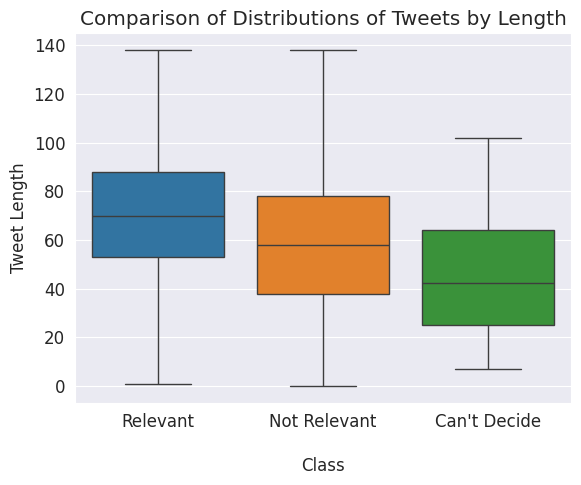

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.boxplot(data=df_copy, x="choose_one", y="length", hue="choose_one")

ax.set_title("Comparison of Distributions of Tweets by Length")
ax.set_xlabel("\nClass")
ax.set_ylabel("Tweet Length")

plt.show()

Получили 3 разных распределения: у всех у них разные средние. От остальных распределений сильнее всего отличается распределение `Can't Decide` - среднее и разброс значительно меньше, чем у остальных двух классов.



---



**3. + 4. + 5. Tokenizers and Embeddings**

**Скачаем необходимые библиотеки:**

In [45]:
!pip install tokenizers

In [46]:
!pip install transformers

In [50]:
!pip install gensim

**Импорты:**

**hugging face:**

In [47]:
import tokenizers
import transformers

**nltk:**

In [48]:
import nltk

nltk.download("punkt")

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**sklearn:**

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD

**gensim:**

In [51]:
from gensim.models import FastText

**Удалим всё, что связано с разметкой, из датафрейма, с которым работаем:**

In [52]:
texts = df["text"]

texts

0                              happened terrible car crash
1             deeds reason earthquake may allah forgive us
2        heard earthquake different cities , stay safe ...
3        forest fire spot pond , geese fleeing across s...
4                  forest fire near la ronge sask . canada
                               ...                        
10871         m1 . 94 [01 : 04 utc] ? 5km volcano hawaii .
10872    police investigating e-bike collided car littl...
10873    latest : homes razed northern california wildf...
10874             meg issues hazardous weather outlook hwo
10875    cityofcalgary activated municipal emergency pl...
Name: text, Length: 10876, dtype: object

- **Words Tokenizer + TF-IDF Vectorizer:**

**Токенизация:**

In [53]:
tokens = [word_tokenize(t) for t in texts]

**Векторизация:**

In [54]:
def identity_tokenizer(text):
    return text

tf_idf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)
tf_idf_vectors = tf_idf_vectorizer.fit_transform(tokens)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Построим график близости полученных векторов:**

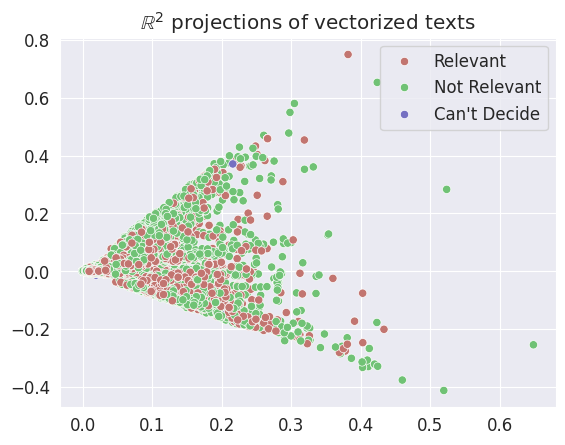

In [55]:
lsa = TruncatedSVD(n_components=2, n_iter=7, random_state=42) # используем TruncatedSVD вмесnо PCA, так как полученные векторы представлены в виде разреженной матрицы
vectors_2proj = lsa.fit_transform(tf_idf_vectors)

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.scatterplot(x=vectors_2proj[:, 0], y=vectors_2proj[:, 1], hue=df["choose_one"], palette=sns.hls_palette(3, s=.4), ax=ax)
ax.legend()
ax.set_title(r"$\mathbb{R}^2$ projections of vectorized texts")

plt.show()

**Как можно видеть, получившиеся проекции tf-idf-векторов на $\mathbb{R}^2$ очень плохо разделяются между собой.**

- **Words Tokenizer + FastText:**

**Токенизация:**

In [56]:
tokens = [word_tokenize(t) for t in texts]

**Получаем FastText-эмбеддинги:**

In [57]:
model = FastText(vector_size=256, window=5, min_count=1, sentences=tokens, epochs=30)

In [58]:
embeds = np.zeros((len(texts), 256))

for num, text in enumerate(tokens):
    # переводим на каждом шаге токен в соответствующий ему эмбеддинг, затем прибавляем к эмбеддингу твита данный эмбеддинг (затем разделим на кол-во токенов, так в итоге усредним эмбеддинги всех токенов в твите)
    # также мной было обнаружено, что после предобработки появились тексты из 0 токенов - то есть бессмысленные. Тем не менее всё равно будем давать таким твитам свои эмбеддинги. Пусть это будет вектор нулей
    embed = np.zeros((1, 256))
    for token in text:
        embed += model.wv[token]
    if len(text) > 0:
        embed /= len(text)
    embeds[num, :] = embed

embeds

array([[ 6.80087410e-01,  1.35807600e-03, -9.88987889e-02, ...,
        -2.86034330e-01, -2.72400478e-01,  2.11753514e-01],
       [ 2.62355337e-01,  5.04928960e-02, -2.42563096e-01, ...,
         1.29502733e-01, -2.82696286e-01,  4.55536945e-01],
       [ 3.35394874e-01,  2.38206114e-01, -2.03855598e-01, ...,
         2.01328259e-01, -2.02354802e-01,  3.04600050e-01],
       ...,
       [ 2.39443845e-01,  3.35262420e-01,  1.71065777e-01, ...,
         6.14485622e-02, -1.53536141e+00, -2.25424778e-01],
       [ 3.46886357e-01,  4.72356732e-01, -1.75894080e-01, ...,
         1.73031509e-01, -4.71038726e-01, -1.04069367e-01],
       [ 2.85251854e-01,  6.36781113e-01, -5.93699147e-01, ...,
         1.21627618e-01, -3.27141672e-01, -3.93780661e-01]])

**Построим график близости полученных эмбеддингов:**

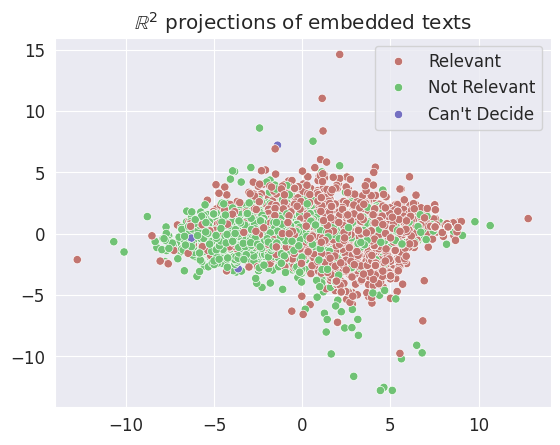

In [59]:
pca = PCA(n_components=2, random_state=42)
embeds_2proj = pca.fit_transform(embeds)

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.scatterplot(x=embeds_2proj[:, 0], y=embeds_2proj[:, 1], hue=df["choose_one"], palette=sns.hls_palette(3, s=.4), ax=ax)
ax.legend()
ax.set_title(r"$\mathbb{R}^2$ projections of embedded texts")

plt.show()

**Получили нечто получше: облака точек разных классов всё ещё пересекаются друг с другом, тем не менее уже можно как-то попробовать визуально отделить прямой основную массу точек одного класса от основной массы точек другого.**

- **Words Tokenizer + Pre-Trained Model (jinaai/jina-embeddings-v2-base-en):**

**Токенизация:**

In [60]:
tokens = [word_tokenize(t) for t in texts]

**Получаем эмбеддинги:**

In [61]:
from transformers import AutoModel

In [68]:
jinaai_model = AutoModel.from_pretrained('jinaai/jina-embeddings-v2-base-en', trust_remote_code=True, device_map = 'cuda')

In [70]:
embeds = np.zeros((len(texts), 768))

for num, text in enumerate(tokens):
    embed = np.zeros((1, 768))
    tweet_embedded = jinaai_model.encode(text)
    for emb in tweet_embedded:
        embed += emb
    if len(text) > 0:
        embed /= len(text)
    embeds[num, :] = embed

embeds

array([[-0.17981939, -0.67921057,  0.55041462, ...,  0.50442411,
        -0.11004259, -0.68778861],
       [-0.1444097 , -0.36574626,  0.61253235, ...,  0.22791611,
         0.10160656, -0.66993548],
       [-0.18210215, -0.5482812 ,  0.55398287, ...,  0.22715129,
        -0.05186563, -0.79209228],
       ...,
       [-0.10004013, -0.60402937,  0.47295821, ...,  0.23380658,
         0.03326541, -0.70838104],
       [-0.09966656, -0.50902424,  0.61334324, ...,  0.14144577,
         0.03626389, -0.55280407],
       [-0.05447278, -0.28156621,  0.61056425, ...,  0.2942117 ,
        -0.05172772, -0.75178967]])

**Построим график близости полученных эмбеддингов:**

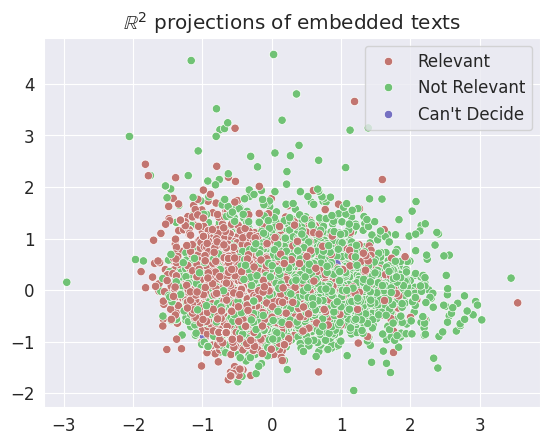

In [71]:
pca = PCA(n_components=2, random_state=42)
embeds_2proj = pca.fit_transform(embeds)

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.scatterplot(x=embeds_2proj[:, 0], y=embeds_2proj[:, 1], hue=df["choose_one"], palette=sns.hls_palette(3, s=.4), ax=ax)
ax.legend()
ax.set_title(r"$\mathbb{R}^2$ projections of embedded texts")

plt.show()

**Получили результат, примерно схожий с FastText эмбеддингами: облака точек разных классов всё ещё пересекаются друг с другом, тем не менее уже можно как-то попробовать визуально отделить прямой основную массу точек одного класса от основной массы точек другого.**

- **BPE + TF-IDF Vectorizer:**

**Токенизация:**

In [73]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

In [74]:
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])

tokenizer.pre_tokenizer = Whitespace()

In [76]:
tokenizer.train_from_iterator(texts, trainer=trainer)

In [85]:
tokens = []
for text in texts:
    tokens.append(tokenizer.encode(text).tokens)

tokens

[['happened', 'terrible', 'car', 'crash'],
 ['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['heard',
  'earthquake',
  'different',
  'cities',
  ',',
  'stay',
  'safe',
  'everyone',
  '.'],
 ['forest',
  'fire',
  'spot',
  'pond',
  ',',
  'geese',
  'fleeing',
  'across',
  'street',
  ',',
  'cannot',
  'save'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', '.', 'canada'],
 ['residents',
  'asked',
  'shelter',
  'place',
  'notified',
  'officers',
  '.',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected'],
 ['13',
  ',',
  '000',
  'people',
  'receive',
  'wildfires',
  'evacuation',
  'orders',
  'california'],
 ['got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wildfires',
  'pours',
  'school'],
 ['rockyfire',
  'update',
  '=>',
  'california',
  'hwy',
  '.',
  '20',
  'closed',
  'directions',
  'due',
  'lake',
  'county',
  'fire',
  '-',
  'cafire',
  'wildfires'],
 ['apocalypse', 'lighting', '.', 'spokane', 'wild

**Векторизация:**

In [86]:
def identity_tokenizer(text):
    return text

tf_idf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)
tf_idf_vectors = tf_idf_vectorizer.fit_transform(tokens)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Построим график близости полученных векторов:**

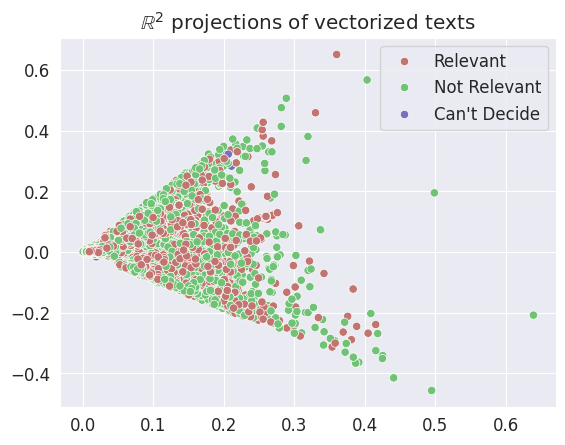

In [87]:
lsa = TruncatedSVD(n_components=2, n_iter=7, random_state=42) # используем TruncatedSVD вмесnо PCA, так как полученные векторы представлены в виде разреженной матрицы
vectors_2proj = lsa.fit_transform(tf_idf_vectors)

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.scatterplot(x=vectors_2proj[:, 0], y=vectors_2proj[:, 1], hue=df["choose_one"], palette=sns.hls_palette(3, s=.4), ax=ax)
ax.legend()
ax.set_title(r"$\mathbb{R}^2$ projections of vectorized texts")

plt.show()

**В целом очень похоже на ситуацию для комбинации Words Tokenizer + TfIDFVectorizer.**

- **BPE + FastText:**

**Токенизация:**

In [88]:
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])

tokenizer.pre_tokenizer = Whitespace()

In [89]:
tokenizer.train_from_iterator(texts, trainer=trainer)

In [90]:
tokens = []
for text in texts:
    tokens.append(tokenizer.encode(text).tokens)

tokens

[['happened', 'terrible', 'car', 'crash'],
 ['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['heard',
  'earthquake',
  'different',
  'cities',
  ',',
  'stay',
  'safe',
  'everyone',
  '.'],
 ['forest',
  'fire',
  'spot',
  'pond',
  ',',
  'geese',
  'fleeing',
  'across',
  'street',
  ',',
  'cannot',
  'save'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', '.', 'canada'],
 ['residents',
  'asked',
  'shelter',
  'place',
  'notified',
  'officers',
  '.',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected'],
 ['13',
  ',',
  '000',
  'people',
  'receive',
  'wildfires',
  'evacuation',
  'orders',
  'california'],
 ['got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wildfires',
  'pours',
  'school'],
 ['rockyfire',
  'update',
  '=>',
  'california',
  'hwy',
  '.',
  '20',
  'closed',
  'directions',
  'due',
  'lake',
  'county',
  'fire',
  '-',
  'cafire',
  'wildfires'],
 ['apocalypse', 'lighting', '.', 'spokane', 'wild

**Получаем FastText-эмбеддинги:**

In [91]:
model = FastText(vector_size=256, window=5, min_count=1, sentences=tokens, epochs=30)

In [92]:
embeds = np.zeros((len(texts), 256))

for num, text in enumerate(tokens):
    # переводим на каждом шаге токен в соответствующий ему эмбеддинг, затем прибавляем к эмбеддингу твита данный эмбеддинг (затем разделим на кол-во токенов, так в итоге усредним эмбеддинги всех токенов в твите)
    # также мной было обнаружено, что после предобработки появились тексты из 0 токенов - то есть бессмысленные. Тем не менее всё равно будем давать таким твитам свои эмбеддинги. Пусть это будет вектор нулей
    embed = np.zeros((1, 256))
    for token in text:
        embed += model.wv[token]
    if len(text) > 0:
        embed /= len(text)
    embeds[num, :] = embed

embeds

array([[ 0.71872298,  0.40465787, -0.12695984, ..., -0.04128916,
        -0.36268688,  0.22598797],
       [ 0.29155932,  0.32428318, -0.12226642, ...,  0.04239392,
        -0.40343089,  0.4228658 ],
       [ 0.1941258 ,  0.42719282, -0.17325474, ...,  0.14054426,
        -0.39264871,  0.26897185],
       ...,
       [ 0.54303367, -0.0221063 , -0.27346038, ...,  0.00807057,
        -1.18316216, -0.43305841],
       [ 0.1798645 ,  0.34648118, -0.25751284, ...,  0.26280758,
        -0.65230271, -0.11160989],
       [ 0.10450384,  0.68610321, -0.62624733, ...,  0.19916646,
        -0.44973765, -0.39466901]])

**Построим график близости полученных эмбеддингов:**

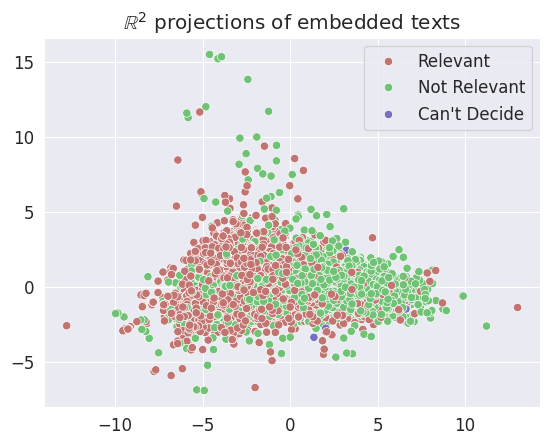

In [93]:
pca = PCA(n_components=2, random_state=42)
embeds_2proj = pca.fit_transform(embeds)

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.scatterplot(x=embeds_2proj[:, 0], y=embeds_2proj[:, 1], hue=df["choose_one"], palette=sns.hls_palette(3, s=.4), ax=ax)
ax.legend()
ax.set_title(r"$\mathbb{R}^2$ projections of embedded texts")

plt.show()

**В целом здесь все очень похоже на ситуацию для комбинации Words Tokenizer + FastText.**

- **BPE + Pre-Trained Model (jinaai/jina-embeddings-v2-base-en):**

**Токенизация:**

In [94]:
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])

tokenizer.pre_tokenizer = Whitespace()

In [95]:
tokenizer.train_from_iterator(texts, trainer=trainer)

In [96]:
tokens = []
for text in texts:
    tokens.append(tokenizer.encode(text).tokens)

tokens

[['happened', 'terrible', 'car', 'crash'],
 ['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['heard',
  'earthquake',
  'different',
  'cities',
  ',',
  'stay',
  'safe',
  'everyone',
  '.'],
 ['forest',
  'fire',
  'spot',
  'pond',
  ',',
  'geese',
  'fleeing',
  'across',
  'street',
  ',',
  'cannot',
  'save'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', '.', 'canada'],
 ['residents',
  'asked',
  'shelter',
  'place',
  'notified',
  'officers',
  '.',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected'],
 ['13',
  ',',
  '000',
  'people',
  'receive',
  'wildfires',
  'evacuation',
  'orders',
  'california'],
 ['got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wildfires',
  'pours',
  'school'],
 ['rockyfire',
  'update',
  '=>',
  'california',
  'hwy',
  '.',
  '20',
  'closed',
  'directions',
  'due',
  'lake',
  'county',
  'fire',
  '-',
  'cafire',
  'wildfires'],
 ['apocalypse', 'lighting', '.', 'spokane', 'wild

**Получаем эмбеддинги:**

In [99]:
import gc
import torch

jinaai_model.cpu()
del jinaai_model
gc.collect()
torch.cuda.empty_cache()

In [100]:
jinaai_model = AutoModel.from_pretrained('jinaai/jina-embeddings-v2-base-en', trust_remote_code=True, device_map = 'cuda')

In [101]:
embeds = np.zeros((len(texts), 768))

for num, text in enumerate(tokens):
    embed = np.zeros((1, 768))
    tweet_embedded = jinaai_model.encode(text)
    for emb in tweet_embedded:
        embed += emb
    if len(text) > 0:
        embed /= len(text)
    embeds[num, :] = embed

embeds

array([[-0.17981939, -0.67921057,  0.55041462, ...,  0.50442411,
        -0.11004259, -0.68778861],
       [-0.1444097 , -0.36574626,  0.61253235, ...,  0.22791611,
         0.10160656, -0.66993548],
       [-0.18210215, -0.5482812 ,  0.55398287, ...,  0.22715129,
        -0.05186563, -0.79209228],
       ...,
       [-0.10004013, -0.60402937,  0.47295821, ...,  0.23380658,
         0.03326541, -0.70838104],
       [-0.09966656, -0.50902424,  0.61334324, ...,  0.14144577,
         0.03626389, -0.55280407],
       [-0.05447278, -0.28156621,  0.61056425, ...,  0.2942117 ,
        -0.05172772, -0.75178967]])

**Построим график близости полученных эмбеддингов:**

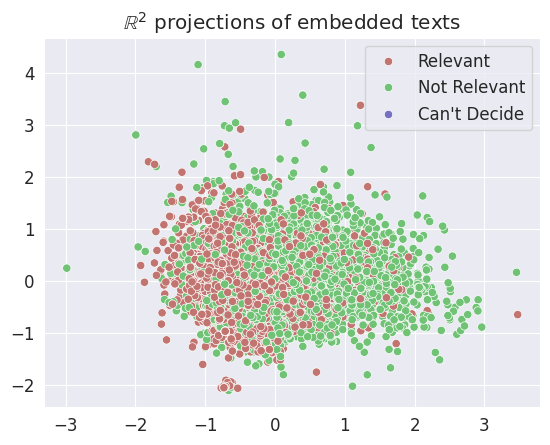

In [102]:
pca = PCA(n_components=2, random_state=42)
embeds_2proj = pca.fit_transform(embeds)

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.scatterplot(x=embeds_2proj[:, 0], y=embeds_2proj[:, 1], hue=df["choose_one"], palette=sns.hls_palette(3, s=.4), ax=ax)
ax.legend()
ax.set_title(r"$\mathbb{R}^2$ projections of embedded texts")

plt.show()

**В целом здесь все очень похоже на ситуацию для комбинации Words Tokenizer + Pre-Trained Model (jinaai/jina-embeddings-v2-base-en).**

- **BertTokenizer + TfIDFVectorizer:**

**Токенизация:**

In [103]:
from transformers import BertTokenizer

In [108]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
ids = tokenizer(list(texts))

tokens = []
for tok in ids['input_ids']:
    tokens.append(tokenizer.convert_ids_to_tokens(tok))

In [109]:
tokens

[['[CLS]', 'happened', 'terrible', 'car', 'crash', '[SEP]'],
 ['[CLS]',
  'deeds',
  'reason',
  'earthquake',
  'may',
  'allah',
  'forgive',
  'us',
  '[SEP]'],
 ['[CLS]',
  'heard',
  'earthquake',
  'different',
  'cities',
  ',',
  'stay',
  'safe',
  'everyone',
  '.',
  '[SEP]'],
 ['[CLS]',
  'forest',
  'fire',
  'spot',
  'pond',
  ',',
  'geese',
  'fleeing',
  'across',
  'street',
  ',',
  'cannot',
  'save',
  '[SEP]'],
 ['[CLS]',
  'forest',
  'fire',
  'near',
  'la',
  'ron',
  '##ge',
  'sas',
  '##k',
  '.',
  'canada',
  '[SEP]'],
 ['[CLS]',
  'residents',
  'asked',
  'shelter',
  'place',
  'notified',
  'officers',
  '.',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected',
  '[SEP]'],
 ['[CLS]',
  '13',
  ',',
  '000',
  'people',
  'receive',
  'wild',
  '##fires',
  'evacuation',
  'orders',
  'california',
  '[SEP]'],
 ['[CLS]',
  'got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wild',
  '##fires',
  'pour',
  '##s',
  'school',
  

**Векторизация:**

In [110]:
def identity_tokenizer(text):
    return text

tf_idf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)
tf_idf_vectors = tf_idf_vectorizer.fit_transform(tokens)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Построим график близости полученных эмбеддингов:**

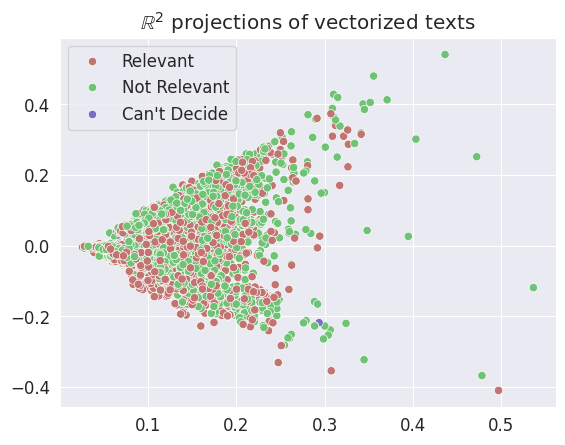

In [111]:
lsa = TruncatedSVD(n_components=2, n_iter=7, random_state=42) # используем TruncatedSVD вмесnо PCA, так как полученные векторы представлены в виде разреженной матрицы
vectors_2proj = lsa.fit_transform(tf_idf_vectors)

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.scatterplot(x=vectors_2proj[:, 0], y=vectors_2proj[:, 1], hue=df["choose_one"], palette=sns.hls_palette(3, s=.4), ax=ax)
ax.legend()
ax.set_title(r"$\mathbb{R}^2$ projections of vectorized texts")

plt.show()

**Как и всюду выше, tf-idf оказался хуже, чем эмбеддинги.**

- **BertTokenizer + FastText:**

**Токенизация - см. выше.**

**Получаем эмбеддинги:**

In [112]:
model = FastText(vector_size=256, window=5, min_count=1, sentences=tokens, epochs=30)

In [113]:
embeds = np.zeros((len(texts), 256))

for num, text in enumerate(tokens):
    # переводим на каждом шаге токен в соответствующий ему эмбеддинг, затем прибавляем к эмбеддингу твита данный эмбеддинг (затем разделим на кол-во токенов, так в итоге усредним эмбеддинги всех токенов в твите)
    # также мной было обнаружено, что после предобработки появились тексты из 0 токенов - то есть бессмысленные. Тем не менее всё равно будем давать таким твитам свои эмбеддинги. Пусть это будет вектор нулей
    embed = np.zeros((1, 256))
    for token in text:
        embed += model.wv[token]
    if len(text) > 0:
        embed /= len(text)
    embeds[num, :] = embed

embeds

array([[ 1.02206474, -0.05839579, -0.3199747 , ...,  0.02494206,
        -0.31078353, -0.40118909],
       [ 0.61118627, -0.14887046, -0.2548429 , ..., -0.17023168,
        -0.26359619, -0.05001386],
       [ 0.56078671, -0.00316873, -0.18986016, ..., -0.11014722,
        -0.12389655, -0.07659757],
       ...,
       [ 0.62226336, -1.00403994, -0.52406881, ...,  0.28886832,
        -0.07096128, -0.50845932],
       [ 0.04918008, -0.6244094 , -0.45769603, ...,  0.15255286,
         0.02251367, -0.08883405],
       [ 0.15283814, -0.89671285,  0.02525861, ...,  0.42041948,
        -0.02750993, -0.25073131]])

**Построим график близости полученных эмбеддингов:**

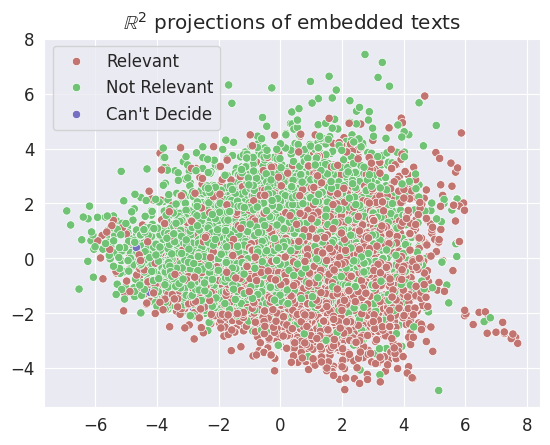

In [114]:
pca = PCA(n_components=2, random_state=42)
embeds_2proj = pca.fit_transform(embeds)

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.scatterplot(x=embeds_2proj[:, 0], y=embeds_2proj[:, 1], hue=df["choose_one"], palette=sns.hls_palette(3, s=.4), ax=ax)
ax.legend()
ax.set_title(r"$\mathbb{R}^2$ projections of embedded texts")

plt.show()

**Здесь всё хорошо разделилось.**

- - **BertTokenizer + Pre-Trained Model (jinaai/jina-embeddings-v2-base-en):**

**Токенизация - см. выше.**

**Получаем эмбеддинги:**

In [115]:
import gc
import torch

jinaai_model.cpu()
del jinaai_model
gc.collect()
torch.cuda.empty_cache()

In [116]:
jinaai_model = AutoModel.from_pretrained('jinaai/jina-embeddings-v2-base-en', trust_remote_code=True, device_map = 'cuda')

In [117]:
embeds = np.zeros((len(texts), 768))

for num, text in enumerate(tokens):
    embed = np.zeros((1, 768))
    tweet_embedded = jinaai_model.encode(text)
    for emb in tweet_embedded:
        embed += emb
    if len(text) > 0:
        embed /= len(text)
    embeds[num, :] = embed

embeds

array([[-0.16279993, -0.51886511,  0.57724385, ...,  0.42340457,
        -0.06635845, -0.68383909],
       [-0.14093221, -0.32850803,  0.61661454, ...,  0.23534936,
         0.08369616, -0.67126979],
       [-0.17240383, -0.48462537,  0.56796823, ...,  0.23337211,
        -0.03861557, -0.7709736 ],
       ...,
       [-0.12618196, -0.4685206 ,  0.50972489, ...,  0.15961713,
         0.03822502, -0.75949451],
       [-0.086678  , -0.43606332,  0.62127029, ...,  0.17934287,
         0.03072852, -0.63798906],
       [-0.12664812, -0.28277326,  0.62222964, ...,  0.09711027,
        -0.0642763 , -0.88057518]])

**Построим график близости полученных эмбеддингов:**

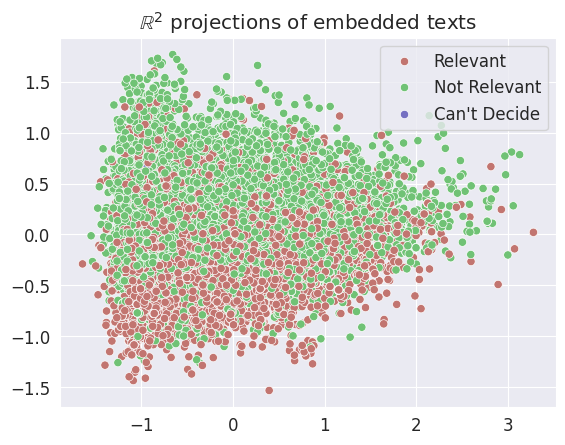

In [118]:
pca = PCA(n_components=2, random_state=42)
embeds_2proj = pca.fit_transform(embeds)

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.scatterplot(x=embeds_2proj[:, 0], y=embeds_2proj[:, 1], hue=df["choose_one"], palette=sns.hls_palette(3, s=.4), ax=ax)
ax.legend()
ax.set_title(r"$\mathbb{R}^2$ projections of embedded texts")

plt.show()

**Тоже всё неплохо разделилось.**